### J-Term 2017, Harvard GSD :
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, elliehan07@gmail.com <br>
Teaching Assistant: NJ Namju Lee, nj.namju@gmail.com <br>
Date/Time: Jan 9-12/ 1:00 - 3:00 p.m. <br>
Location: 20 Sumner/Room 1-D<br>
***

# predict missing values

In [57]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# statistical function
def MSE_MeanSquaredErrorLoss(fullData,targetData ): # common use 
    sum = RSS_ResidualSumofSquares(fullData,targetData)
    return sum / len(fullData)

def MSE_MeanSquaredErrorLossForCategorical(fullData,targetData ): # Categorical
    sum = 0.0;
    for i in range(len(fullData)):
        if(fullData[i] != targetData[i]): sum +=1
    return sum / len(fullData)

def GetMean(dataArray):
    return np.mean(dataArray)
#     theSum=0.0
#     for d in dataArray: theSum += d
#     return theSum/len(dataArray)
def GetMedian(dataArray):
    return np.median(dataArray)

def RSS_ResidualSumofSquares(dataFull, missingFill): # residual standard error, RSE ??? -- OLS (Ordinary Least Squares) Residual Sum of Squares(RSS)
    sumSoFar=0.0
    for i in range(len(missingFill)):
        sumSoFar += (dataFull[i]-missingFill[i])**2
    return sumSoFar

def TSS_TotalSumOfSquare(fullData,targetData):
    # meanVal = targetData.mean()# for numpy
    meanVal = GetMean(targetData)# manual
    sumSoFar= 0.0
    for i in range(len(targetData)):
        # sumSoFar += (fullData.y[i]-meanVal)**2
        sumSoFar += (fullData[i]-meanVal)**2
    return sumSoFar

def R_Squared_CoefficientOfDetermination(fullData, targetData): # this is for regression 
    RSS = RSS_ResidualSumofSquares(fullData, targetData)
    TSS = TSS_TotalSumOfSquare(fullData, targetData)
    return 1-(RSS/TSS)
def R_Squared_CoefficientOfDeterminationBySKLearn(fullData, targetData):
    return sk.metrics.r2_score(fullData, targetData)

In [60]:
# utility function
def DeepCopy(d):
    return d.copy(deep=True)
def GetPandasFromCsv(path, fileName):
    path = os.path.join(path , fileName)
    return pd.read_csv(path)

### 1. Load data

In [62]:
# fn1 =  'dailyChilledWaterWithFeatures'
fn2 =  'dailyElectricityWithFeatures'
# fn3 =  'dailySteamWithFeatures'
theDir = 'data/'

dTrain = GetPandasFromCsv(theDir, fn2 + "_train.csv")
dTest = GetPandasFromCsv(theDir, fn2 + "_test.csv")

index =  dTrain.columns.values
dTrain.rename(columns={index[0]:"time"},inplace=True)
dTest.rename(columns={index[0]:"time"},inplace=True)

print dTrain.head(2)
print dTest.head(2)

         time  electricity-kWh    startDay      endDay       RH-%       T-C  \
0  2012-01-01      2800.244977  2012-01-01  2012-01-02  76.652174  7.173913   
1  2012-01-02              NaN  2012-01-02  2012-01-03  55.958333  5.833333   

     Tdew-C  pressure-mbar  solarRadiation-W/m2  windDirection  windSpeed-m/s  \
0  3.073913    1004.956522            95.260870     236.086957       4.118361   
1 -2.937500     994.625000            87.333333     253.750000       5.914357   

   humidityRatio-kg/kg  coolingDegrees  heatingDegrees  dehumidification  \
0             0.004796             0.0        7.826087               0.0   
1             0.003415             0.0        9.166667               0.0   

   occupancy  
0        0.0  
1        0.3  
         time  electricity-kWh    startDay      endDay       RH-%       T-C  \
0  2012-01-01      2800.244977  2012-01-01  2012-01-02  76.652174  7.173913   
1  2012-01-02      3168.974047  2012-01-02  2012-01-03  55.958333  5.833333   

     T

### 2. data exploration

In [63]:
# print null values
def GetCountForNullFromPandas(d):
    return d.isnull().sum()

colTest = dTest['electricity-kWh']
colTrain = dTrain['electricity-kWh']
 
x = dTest.index.values

print x
print colTest.shape
print GetCountForNullFromPandas(colTest)
print "----------------"
print colTrain.shape
print GetCountForNullFromPandas(colTrain)

[   0    1    2 ..., 1480 1481 1482]
(1483L,)
0
----------------
(1483L,)
384


In [64]:
colTest.describe()

count    1483.000000
mean     5081.858935
std      1155.051478
min      2223.362065
25%      4246.928294
50%      5092.179797
75%      6011.419225
max      7870.142990
Name: electricity-kWh, dtype: float64

In [65]:
def VisScatterPlot(d):
    x = range(len(d))
    y = d
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, color="red", alpha=0.5 )
    plt.title("data exploration")
    plt.xlabel('time')
    plt.ylabel('electricity-kWh')
    plt.tight_layout()
    plt.show()

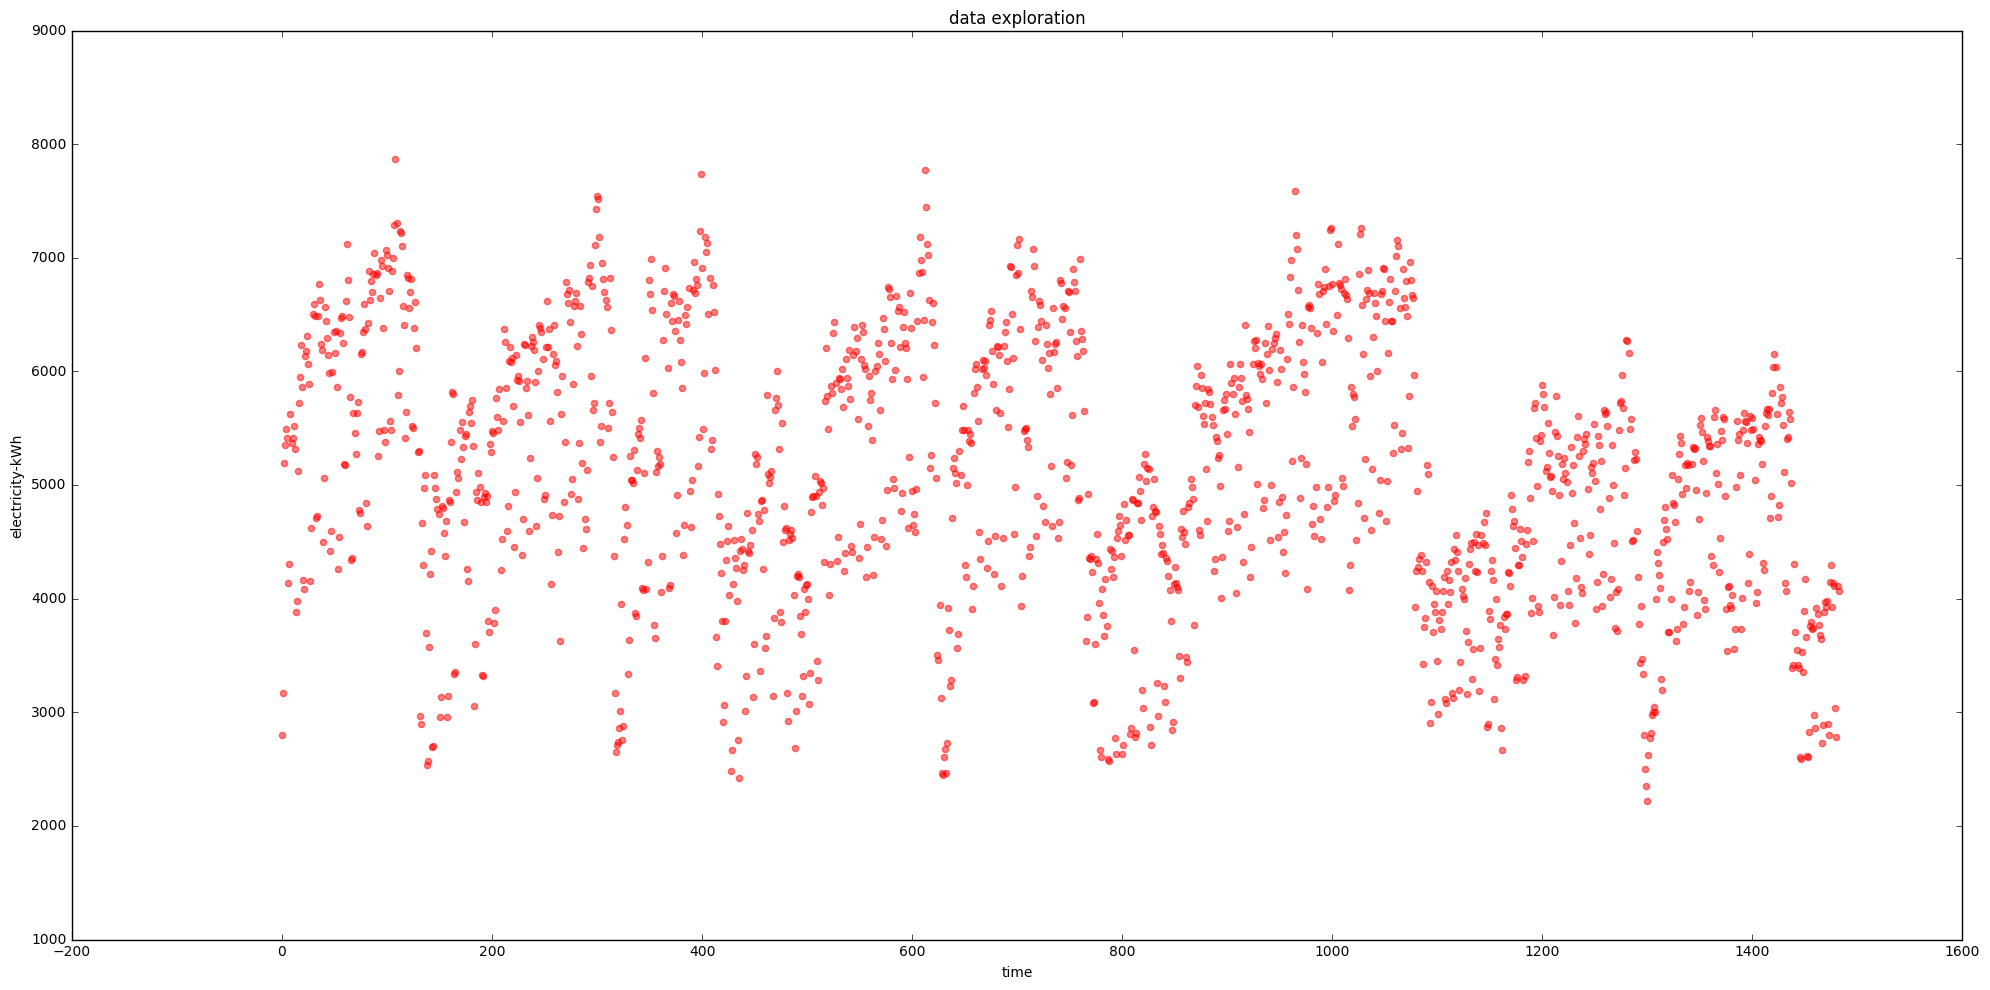

In [66]:
VisScatterPlot(colTest)

In [67]:
# copy for each algorithm
colTrainByMean = DeepCopy(colTrain)
colTrainByMedian = DeepCopy(colTrain)
colTrainByKNN = DeepCopy(colTrain)
colTrainByReg = DeepCopy(colTrain)

### overview:  filling by mean 

In [69]:
# clearn data by removing null data
print colTrain[:10]

dfnull = colTrain[colTrain.isnull()]
dfnull_index = dfnull.index.values

dfnotnull = colTrain[colTrain.notnull()]
dfnotnull_index = dfnotnull.index.values

print dfnotnull_index
print dfnull[:10]
print dfnotnull[:10]

0    2800.244977
1            NaN
2    5194.533376
3    5354.861935
4            NaN
5    5414.499703
6    4138.989708
7    4301.957494
8            NaN
9    5370.202795
Name: electricity-kWh, dtype: float64
[   0    2    3 ..., 1479 1480 1482]
1    NaN
4    NaN
8    NaN
12   NaN
13   NaN
16   NaN
17   NaN
18   NaN
21   NaN
35   NaN
Name: electricity-kWh, dtype: float64
0     2800.244977
2     5194.533376
3     5354.861935
5     5414.499703
6     4138.989708
7     4301.957494
9     5370.202795
10    5411.600996
11    5518.026707
14    3975.859691
Name: electricity-kWh, dtype: float64


In [70]:
# prepare for the test value 
temp = dfnull.index.values
my_test =colTest[temp]
print my_test[:10]

1     3168.974047
4     5496.223993
8     5626.493403
12    5313.596132
13    3881.154390
16    5722.366925
17    5952.708590
18    6234.768844
21    4086.755643
35    6769.173239
Name: electricity-kWh, dtype: float64


In [71]:
mean = GetMean(dfnotnull.tolist())
print mean

5067.54848799


In [73]:
mean = dfnotnull.mean()

In [74]:
colTrainByMean[colTrainByMean.isnull()] = mean
print colTrainByMean[:10]

0    2800.244977
1    5067.548488
2    5194.533376
3    5354.861935
4    5067.548488
5    5414.499703
6    4138.989708
7    4301.957494
8    5067.548488
9    5370.202795
Name: electricity-kWh, dtype: float64


### Loss Function or Cost Function

In [77]:
print "R Square Error:", R_Squared_CoefficientOfDetermination(colTrainByMean,colTest)

R Square Error: 0.662972385108


In [78]:
print "Mean Squared Error :", MSE_MeanSquaredErrorLoss(colTrainByMean,colTest )

Mean Squared Error : 336177.187466


### filling by mean

In [81]:
def fillByMean(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index.values
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index.values
    mean = GetMean(dfnotnull.tolist())
    print "the mean of the data :", mean
    dataFrame[dataFrame.isnull()] = mean
    return dataFrame

In [82]:
colTrainByMean = DeepCopy(colTrain)
colTrainByMean = fillByMean(colTrainByMean)
RSquareMean = R_Squared_CoefficientOfDetermination(colTrainByMean,colTest)
print "R Square :", RSquareMean


the mean of the data : 5067.54848799
R Square : 0.662972385108


### filling by median

In [83]:
def fillByMedian(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index.values
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index.values
    median = GetMedian(dfnotnull.tolist())
    print "the median of the data :", median
    dataFrame[dataFrame.isnull()] = median
    return dataFrame

In [84]:
colTrainByMedian = DeepCopy(colTrain)
colTrainByMedian = fillByMedian(colTrainByMedian)
RSquareMedian = R_Squared_CoefficientOfDetermination(colTrainByMedian,colTest)
print "R Square :", RSquareMedian


the median of the data : 5057.46381204
R Square : 0.662690800408


### KNN (k-nearest neighbors algorithm) 
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [85]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
from statsmodels.regression.linear_model import OLS
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
def fillByKNN(dataFrame, k):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()
    #fit model, predict and evaluate
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    y_pred = neighbours.predict(x_test)
    r = neighbours.score(x_test, my_test)
    return y_pred, r

In [88]:
colTrainByKNN = DeepCopy(colTrain)
k = 3
colTrainByKNN, r = fillByKNN(colTrainByKNN, k)

print len(colTrainByKNN)
print 'R^2 value of KNN fit, for k=', k, ', ', r

384
R^2 value of KNN fit, for k= 3 ,  0.587458235667


In [90]:
colTrainByKNN = DeepCopy(colTrain)
rSquare = []
theMax = -100000
theMaxK = 0
for k in range(1,20):
    temp, r = fillByKNN(colTrainByKNN, k)
    print 'R^2 value of KNN fit, for k=', k , ', ', r
    rSquare.append(r)
    if theMax < r:
        theMax = r
        theMaxK = k
print "---------------------------"
print "the max K :", theMaxK , ", R:", theMax

R^2 value of KNN fit, for k= 1 ,  0.555356962962
R^2 value of KNN fit, for k= 2 ,  0.683826110173
R^2 value of KNN fit, for k= 3 ,  0.587458235667
R^2 value of KNN fit, for k= 4 ,  0.528423720388
R^2 value of KNN fit, for k= 5 ,  0.465996741217
R^2 value of KNN fit, for k= 6 ,  0.438137838074
R^2 value of KNN fit, for k= 7 ,  0.441740390189
R^2 value of KNN fit, for k= 8 ,  0.474207647505
R^2 value of KNN fit, for k= 9 ,  0.511827349056
R^2 value of KNN fit, for k= 10 ,  0.544186435263
R^2 value of KNN fit, for k= 11 ,  0.550163584793
R^2 value of KNN fit, for k= 12 ,  0.545518351986
R^2 value of KNN fit, for k= 13 ,  0.530670162568
R^2 value of KNN fit, for k= 14 ,  0.514507205707
R^2 value of KNN fit, for k= 15 ,  0.50470122648
R^2 value of KNN fit, for k= 16 ,  0.491748771686
R^2 value of KNN fit, for k= 17 ,  0.486637177007
R^2 value of KNN fit, for k= 18 ,  0.482904762147
R^2 value of KNN fit, for k= 19 ,  0.486710977896
---------------------------
the max K : 2 , R: 0.68382611017

In [91]:
def VisSquarePlot(xData, title = 'title', YLable="YLable" , path=""):
    plt.figure(figsize=(20,10))
    yTime = range(len(xData))
    plt.plot(yTime,xData)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(YLable)
    plt.legend(loc='best')
#     plt.axhline(13, color='r', label=r'True $\beta_1$')
#     plt.axhline(20, color='r', label=r'True $\beta_1$')
#     plt.axhspan(13, 20, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')
    if path != "":
        plt.savefig(path)
    plt.tight_layout()
    plt.show()
    return plt

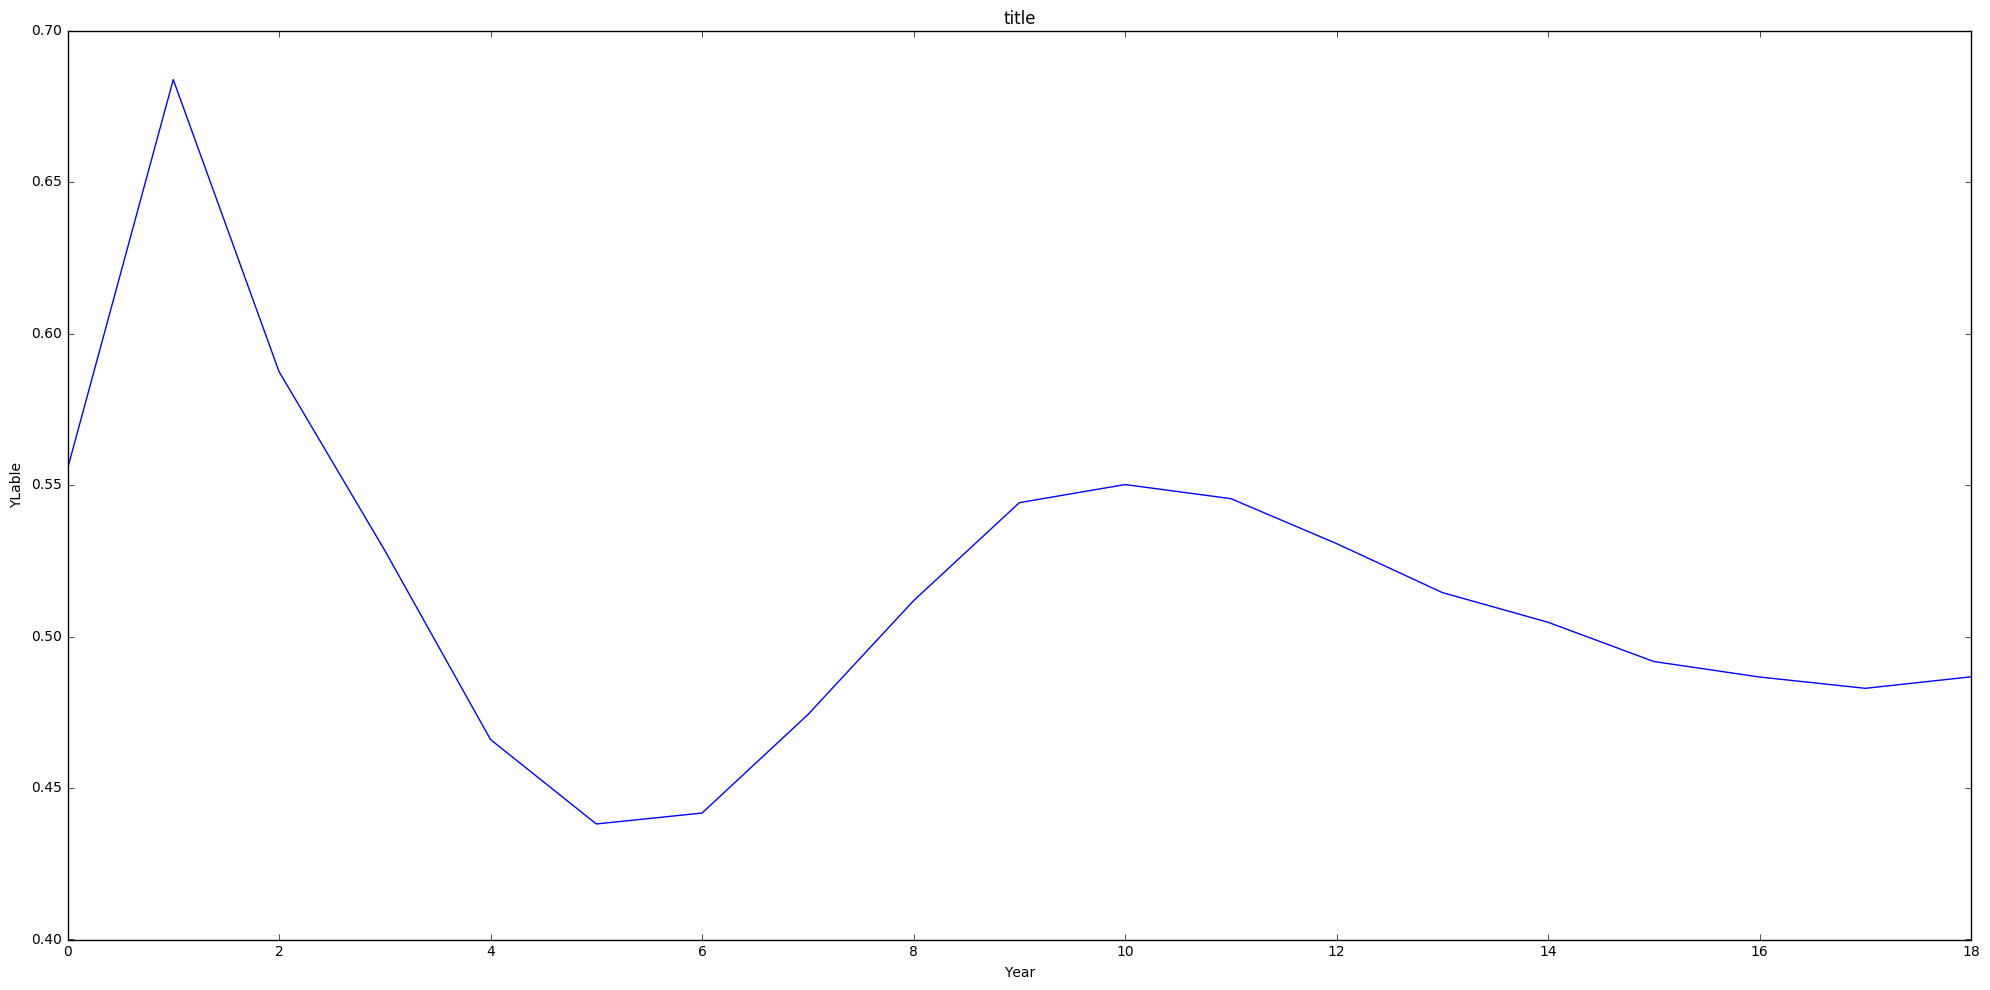

<module 'matplotlib.pyplot' from 'C:\Users\EllieHan\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

In [92]:
VisSquarePlot(rSquare)

### Linear regression
https://en.wikipedia.org/wiki/Linear_regression

In [101]:
def fillByLinReg(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()
    #####
    regression = Lin_Reg()
    
    regression.fit(x_train, y_train)
    
    predicted_y = regression.predict(x_test)
    ####
    r = regression.score(x_test, my_test)
    
    plt.figure(figsize=(20,10))
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_test, regression.predict(x_test), color='blue',linewidth=1)
    plt.tight_layout()
    plt.show()
    return predicted_y, r

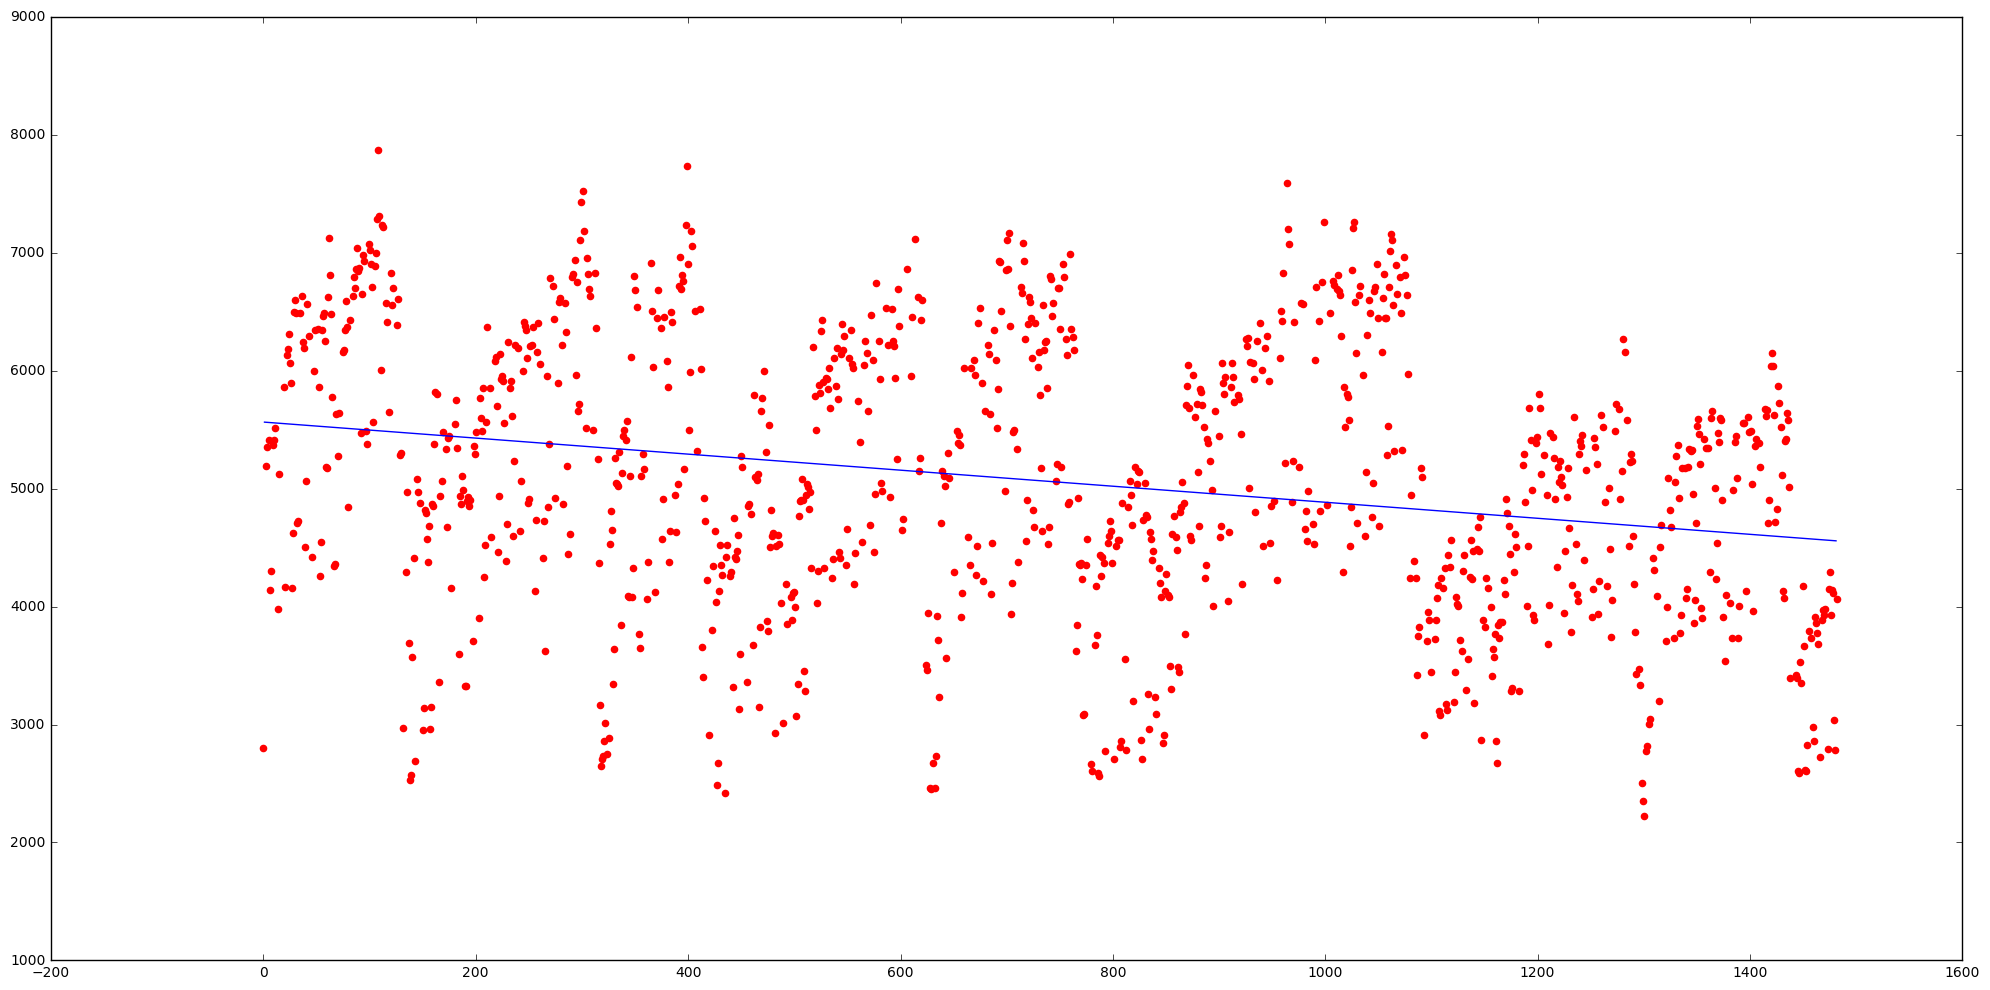

R^2 value = 0.0535343257167


In [102]:
colTrainByReg = DeepCopy(colTrain)
s, rReg = fillByLinReg(colTrainByReg)
print 'R^2 value =',rReg

### Polynomial regression
https://en.wikipedia.org/wiki/Linear_regression

In [103]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def fillByPolynomial(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()

    x_plot = np.linspace(0, len(x_train))
    y = y_train
    X = x_train
    lw = 2
    
    colors = ['teal', 'yellowgreen', 'gold', 'red', 'blue']
    plt.figure(figsize=(20,10))
    plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
    maxR = 0
    
    for count, degree in enumerate([1,2,4,8,12]):
        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(X, y)
        y_plot = model.predict(X)
        plt.plot(X, y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)
        r = model.score(x_test, my_test)
        if maxR < r:
            maxR = r
        print "degree:", degree, ", R:", r
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()
    return maxR


degree: 1 , R: 0.0535343257605
degree: 2 , R: 0.0657124964242
degree: 4 , R: 0.0681959324546
degree: 8 , R: 0.094860068401
degree: 12 , R: 0.153751148547


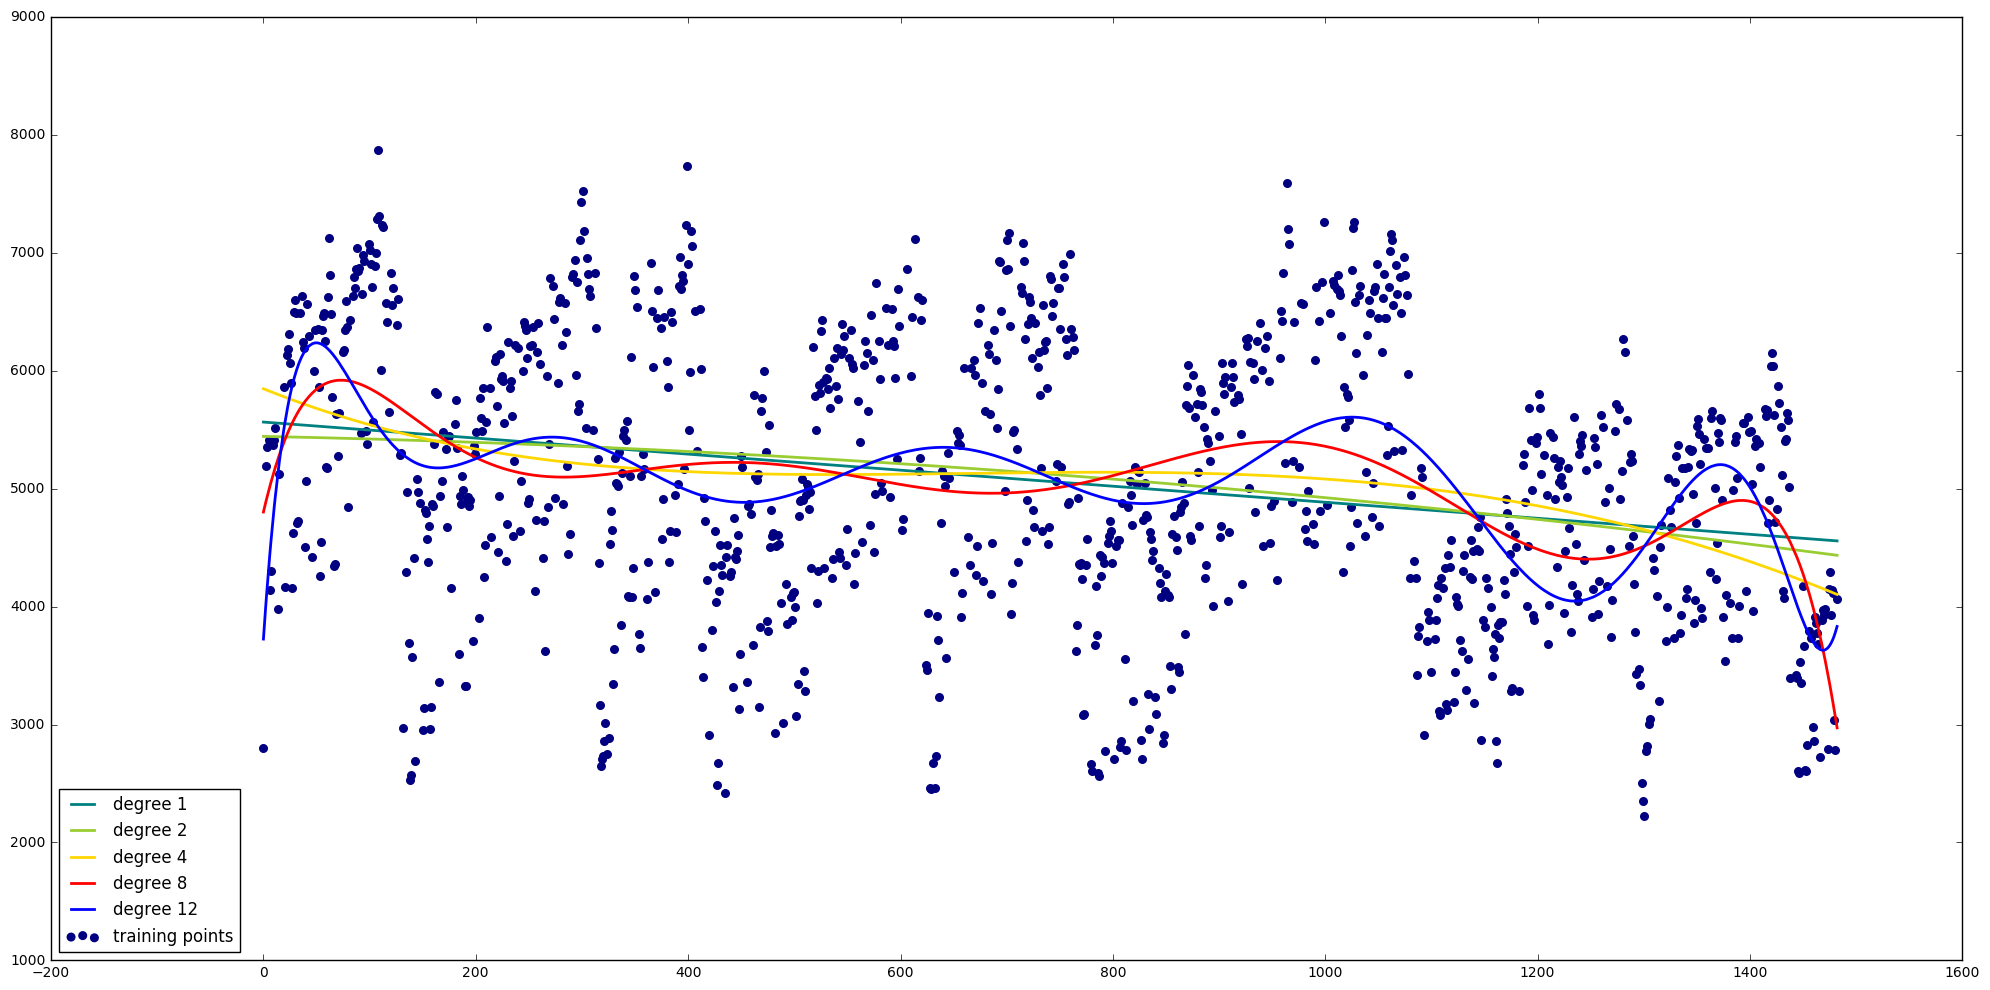

In [104]:
colTrainByPoly = DeepCopy(colTrain)
rPoly = fillByPolynomial(colTrainByPoly)

### Support Vector Regression (SVR) using linear and non-linear kernels
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

In [107]:
from sklearn.svm import SVR
def SupportVectorRegression(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()

    y = y_train
    X = x_train

    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.9)
#     svr_lin = SVR(kernel='linear', C=1e3)
#     svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    y_rbf = svr_rbf.fit(X, y).predict(X)
#     y_lin = svr_lin.fit(X, y).predict(X)
#     y_poly = svr_poly.fit(X, y).predict(X)

    rSqure = 0
    svr_rbfR = svr_rbf.score(x_test, my_test)
#     if rSqure < svr_rbfR:
#         rSqure = svr_rbfR
    print "SupportVectorRegression R (Kernel:rbf):", svr_rbfR
#     svr_linR = svr_lin.score(x_test, my_test)
#     if rSqure < svr_linR:
#         rSqure = svr_linR
#     print "SupportVectorRegression R (Kernel:linear):", svr_linR
#     svr_polyR = svr_poly.score(x_test, my_test)
#     print "SupportVectorRegression R (Kernel:poly):", svr_polyR
    
    lw = 2
    plt.figure(figsize=(20,10))
    plt.scatter(X, y, color='darkorange', label='data')
    plt.hold('on')
    plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#     plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#     plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return svr_rbfR

SupportVectorRegression R (Kernel:rbf): 0.486137483019


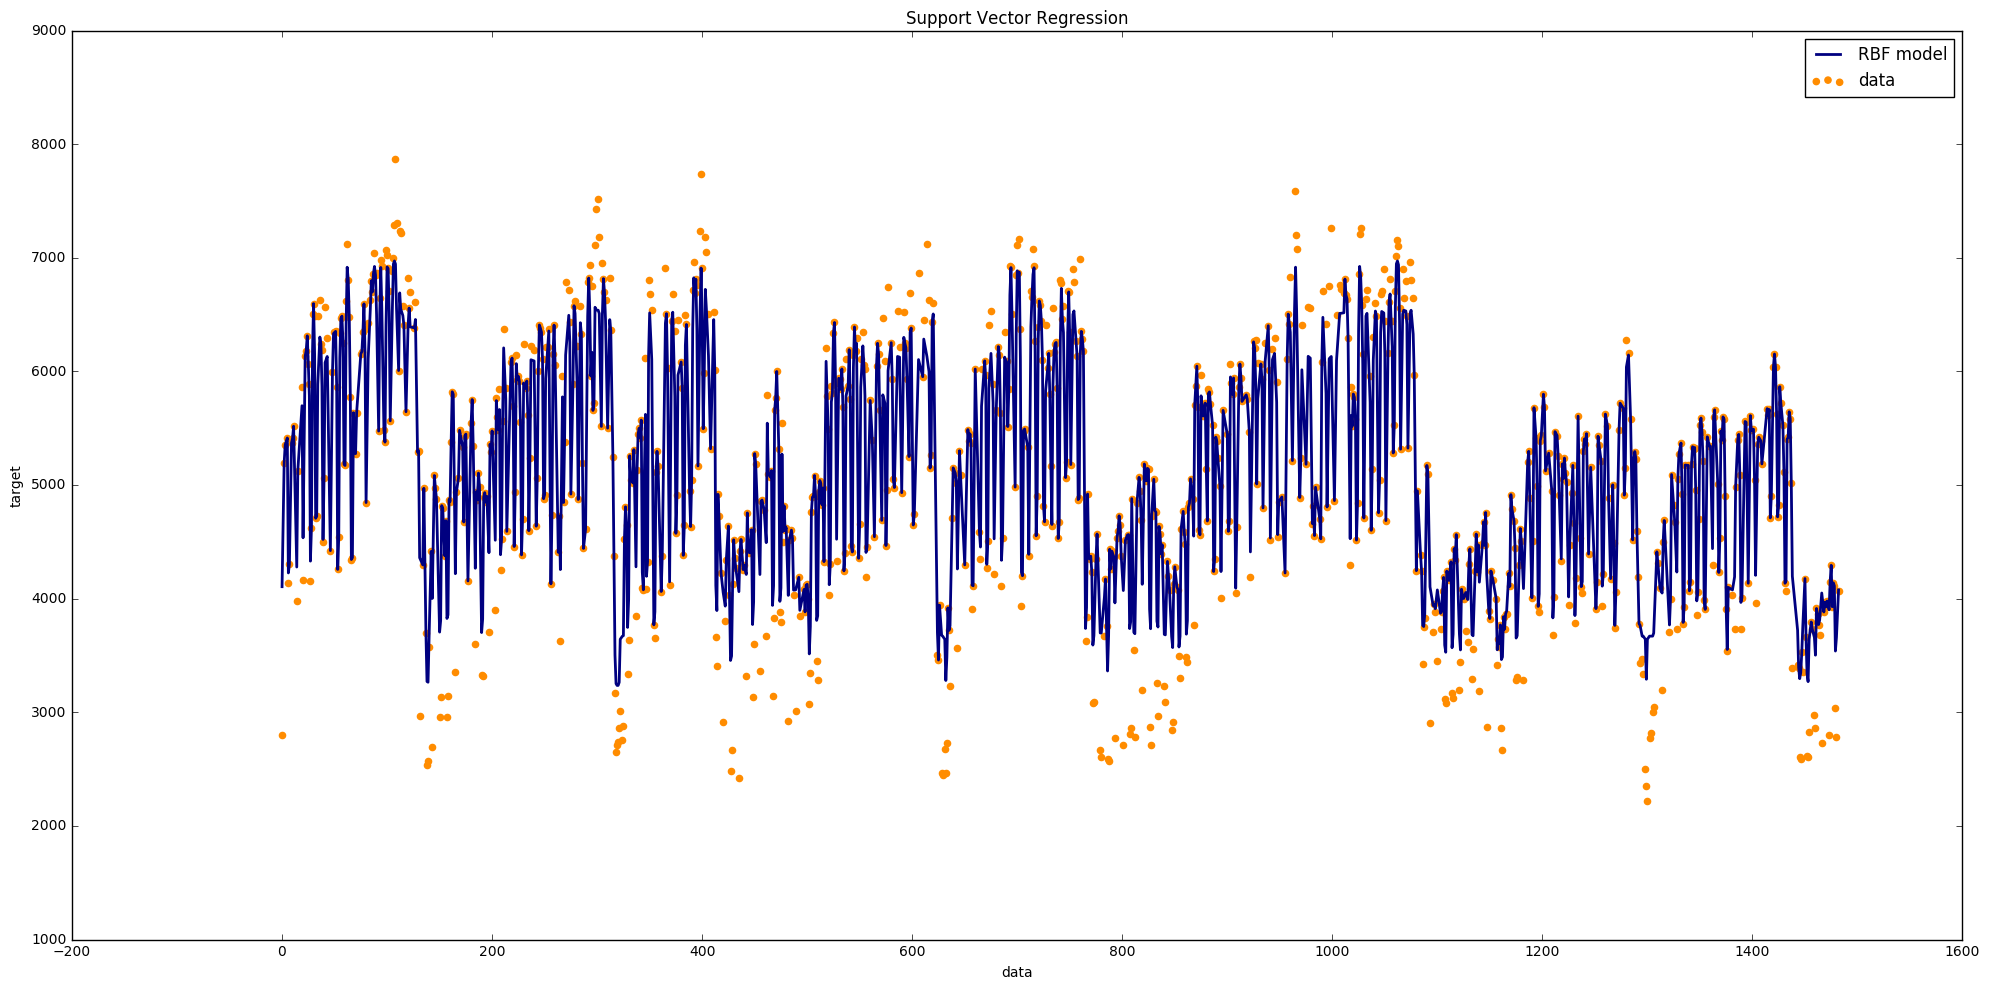

In [109]:
colTrainBySVR = DeepCopy(colTrain)
rSVR = SupportVectorRegression(colTrainBySVR)

### 8. result 

In [111]:
# create dic for save the R Square
dailyElectricityWithFeatures = {}
dailyElectricityWithFeatures["mean"] = RSquareMean
dailyElectricityWithFeatures["median"] = RSquareMedian
dailyElectricityWithFeatures["knn"] = theMax
dailyElectricityWithFeatures["rReg"] = rReg
dailyElectricityWithFeatures['rPoly'] = rPoly
dailyElectricityWithFeatures['rSVR'] = rSVR
print dailyElectricityWithFeatures

{'knn': 0.68382611017334094, 'median': 0.66269080040803741, 'rPoly': 0.15375114854655281, 'rReg': 0.053534325716748432, 'rSVR': 0.48613748301872339, 'mean': 0.66297238510807188}


# dailyChilledWaterWithFeatures.csv

### 1. data exploration 

In [112]:
fn1 =  'dailyChilledWaterWithFeatures'
theDir = 'data/'

dTrain = GetPandasFromCsv(theDir, fn1 + "_train.csv")
dTest = GetPandasFromCsv(theDir, fn1 + "_test.csv")

index =  dTrain.columns.values
dTrain.rename(columns={index[0]:"time"},inplace=True)
dTest.rename(columns={index[0]:"time"},inplace=True)

indexNum = 1
index = dTrain.columns.values
print index
print index[indexNum]
colTest = dTest[index[indexNum]]
colTrain = dTrain[index[indexNum]]

dfnull = colTrain[colTrain.isnull()]
temp = dfnull.index.values
my_test =colTest[temp]

['time' 'chilledWater-TonDays' 'startDay' 'endDay' 'RH-%' 'T-C' 'Tdew-C'
 'pressure-mbar' 'solarRadiation-W/m2' 'windDirection' 'windSpeed-m/s'
 'humidityRatio-kg/kg' 'coolingDegrees' 'heatingDegrees' 'dehumidification'
 'occupancy']
chilledWater-TonDays


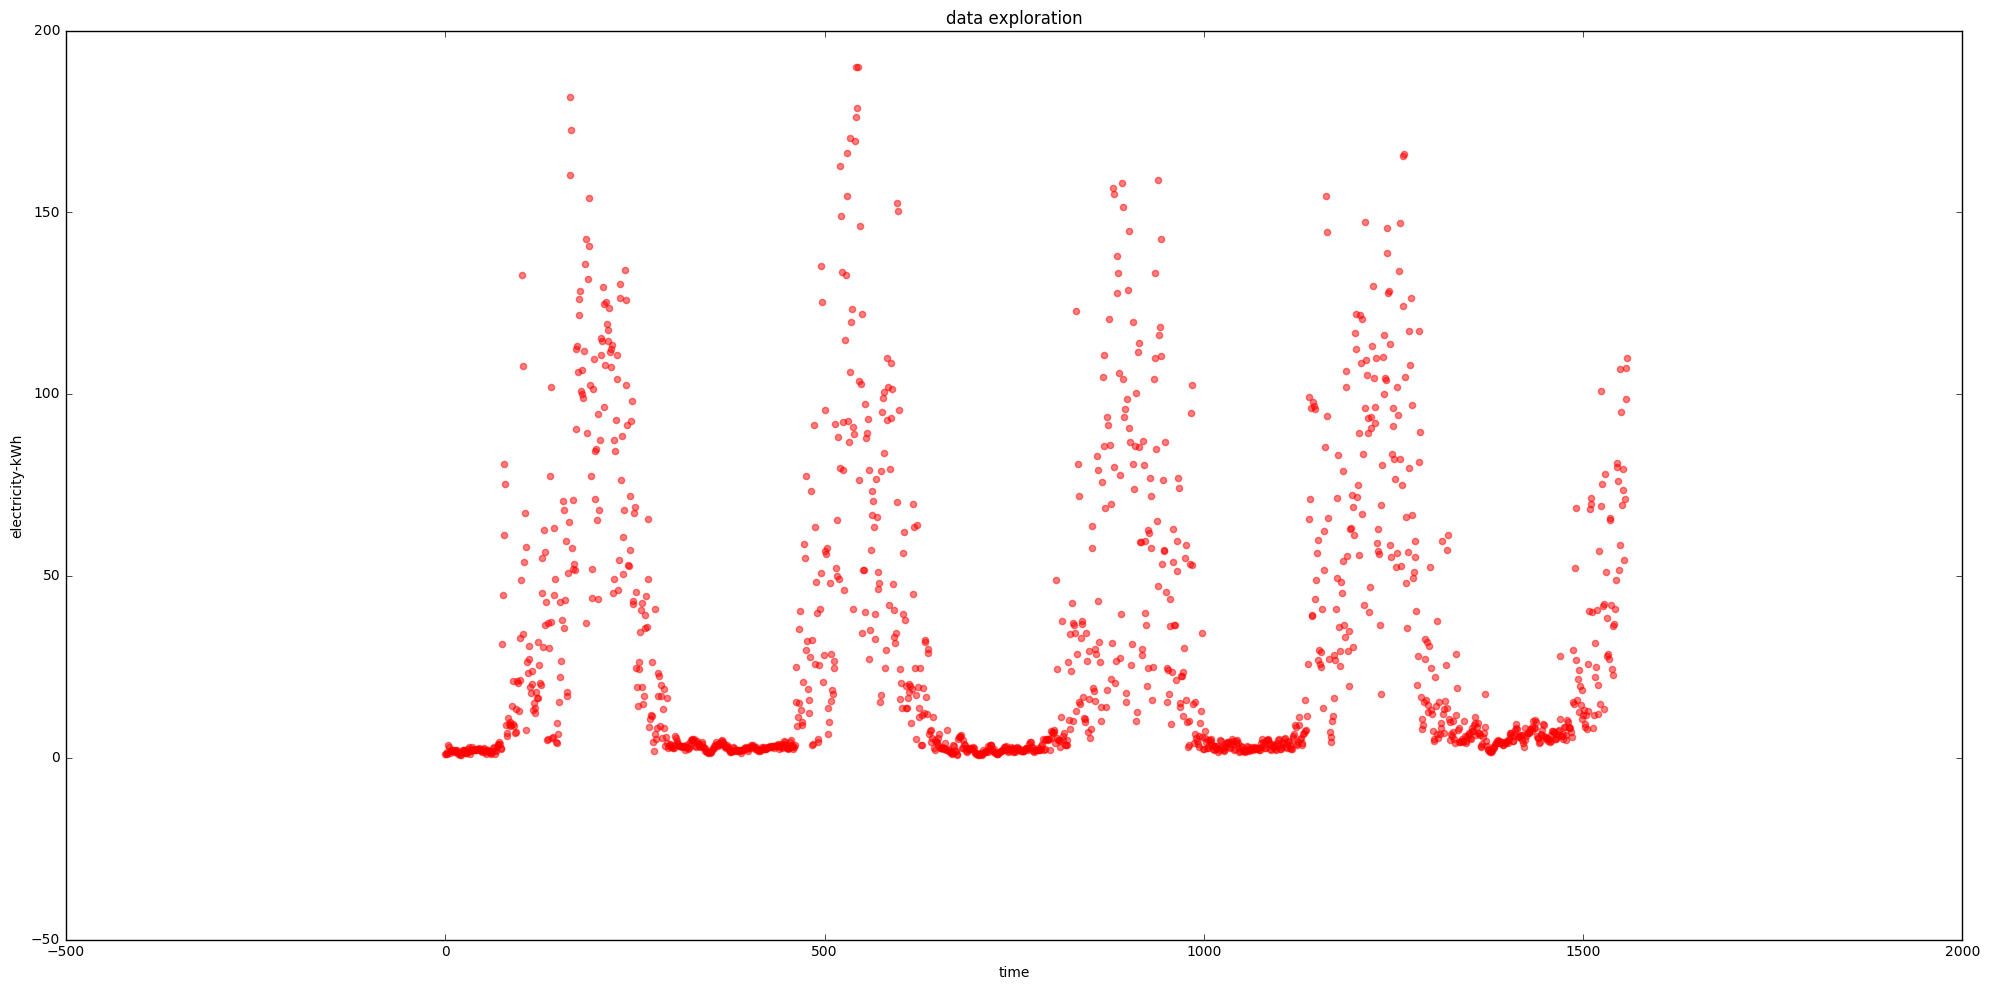

In [113]:
VisScatterPlot(colTest)

### 2. by mean

In [114]:
colTrainByMean = DeepCopy(colTrain)
colTrainByMean = fillByMean(colTrainByMean)
RSquareMean = R_Squared_CoefficientOfDetermination(colTrainByMean,colTest)
print "R Square :", RSquareMean

the mean of the data : 31.9173195206
R Square : 0.664383626123


### 3. by median

In [115]:
colTrainByMedian = DeepCopy(colTrain)
colTrainByMedian = fillByMedian(colTrainByMedian)
RSquareMedian = R_Squared_CoefficientOfDetermination(colTrainByMedian,colTest)
print "R Square :", RSquareMedian

the median of the data : 10.1435709199
R Square : 0.610821938615


### 4. by KNN

In [116]:
colTrainByKNN = DeepCopy(colTrain)
rSquare = []
theMax = -100000
theMaxK = 0
for k in range(1,20):
    temp, r = fillByKNN(colTrainByKNN, k)
    print 'R^2 value of KNN fit, for k=', k , ', ', r
    rSquare.append(r)
    if theMax < r:
        theMax = r
        theMaxK = k
print "---------------------------"
print "the max K :", theMaxK , ", R:",theMax

R^2 value of KNN fit, for k= 1 ,  0.682858953061
R^2 value of KNN fit, for k= 2 ,  0.775349407114
R^2 value of KNN fit, for k= 3 ,  0.735126117402
R^2 value of KNN fit, for k= 4 ,  0.733866307652
R^2 value of KNN fit, for k= 5 ,  0.714119438464
R^2 value of KNN fit, for k= 6 ,  0.70621961862
R^2 value of KNN fit, for k= 7 ,  0.697053891264
R^2 value of KNN fit, for k= 8 ,  0.692951338024
R^2 value of KNN fit, for k= 9 ,  0.696882445233
R^2 value of KNN fit, for k= 10 ,  0.693832448193
R^2 value of KNN fit, for k= 11 ,  0.699585455227
R^2 value of KNN fit, for k= 12 ,  0.688907285362
R^2 value of KNN fit, for k= 13 ,  0.686168302062
R^2 value of KNN fit, for k= 14 ,  0.680456613404
R^2 value of KNN fit, for k= 15 ,  0.678791596992
R^2 value of KNN fit, for k= 16 ,  0.671802572398
R^2 value of KNN fit, for k= 17 ,  0.673071253008
R^2 value of KNN fit, for k= 18 ,  0.671706206816
R^2 value of KNN fit, for k= 19 ,  0.673230857194
---------------------------
the max K : 2 , R: 0.77534940711

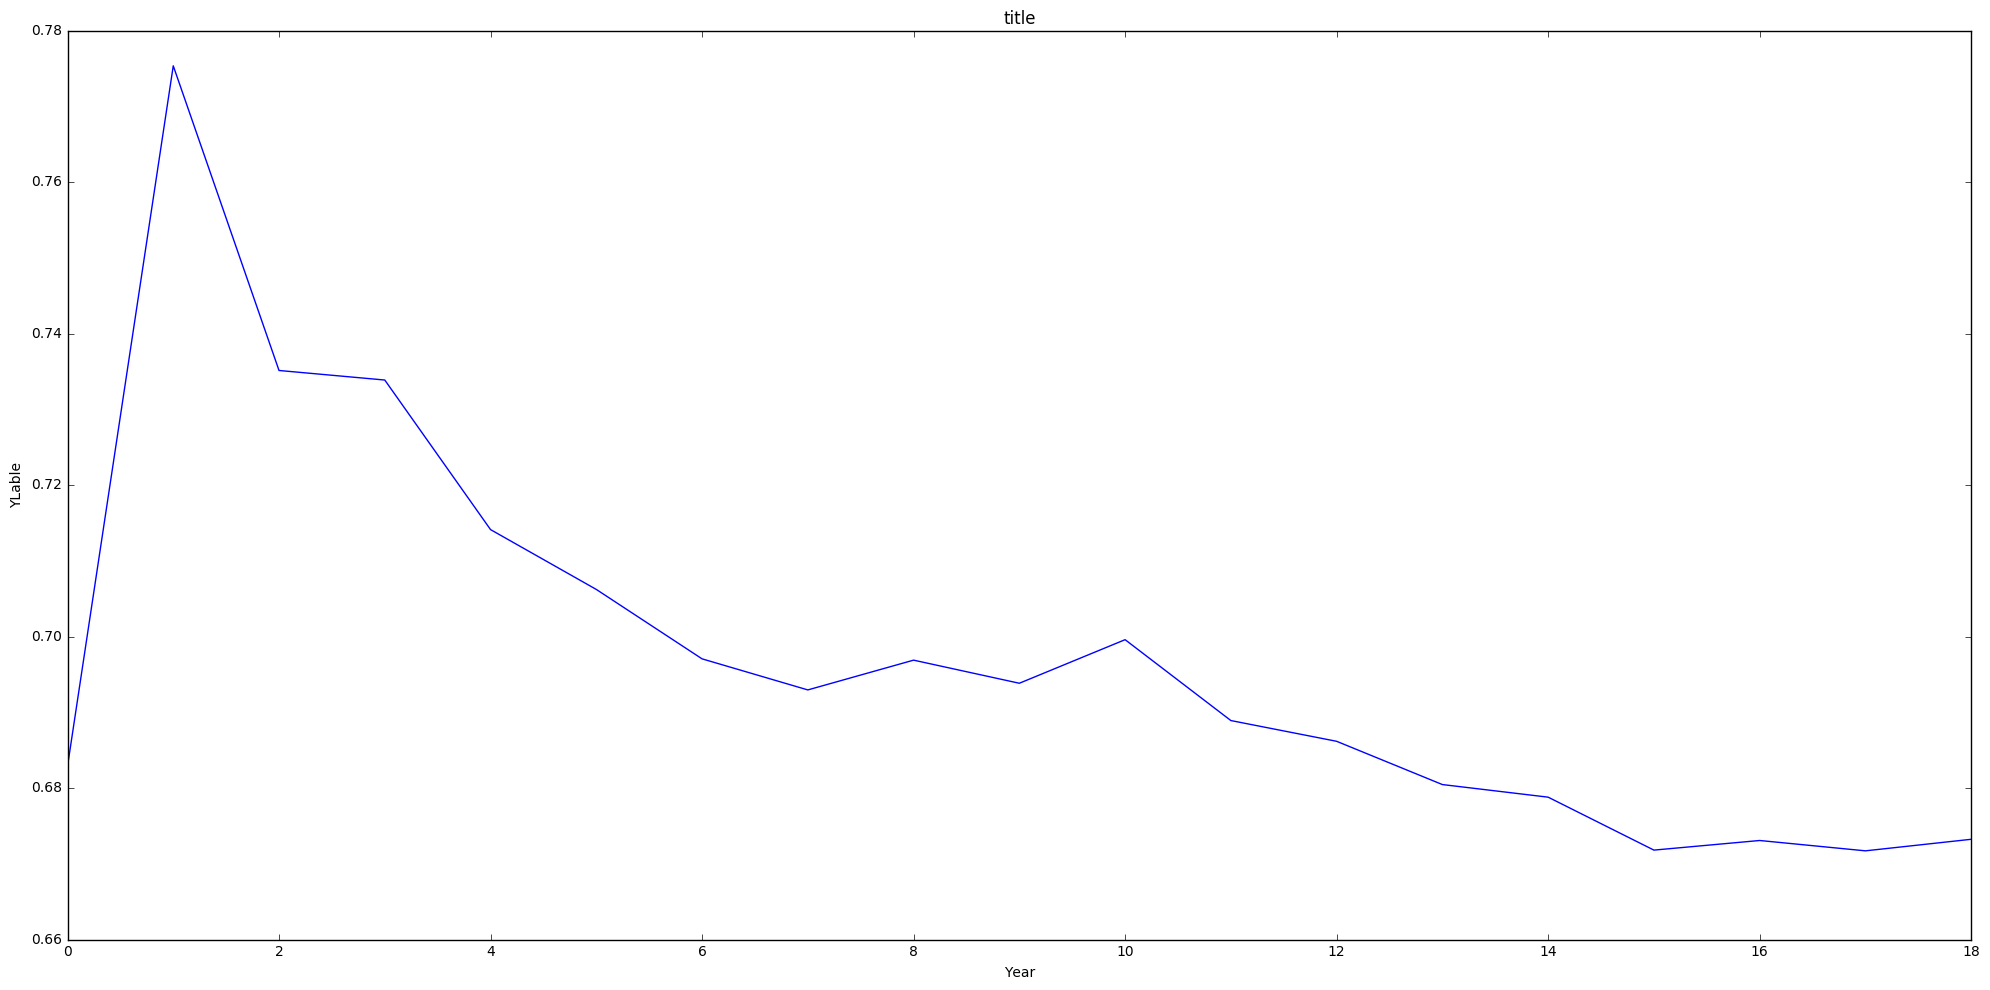

<module 'matplotlib.pyplot' from 'C:\Users\EllieHan\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

In [117]:
VisSquarePlot(rSquare)

### 5. Linear regression

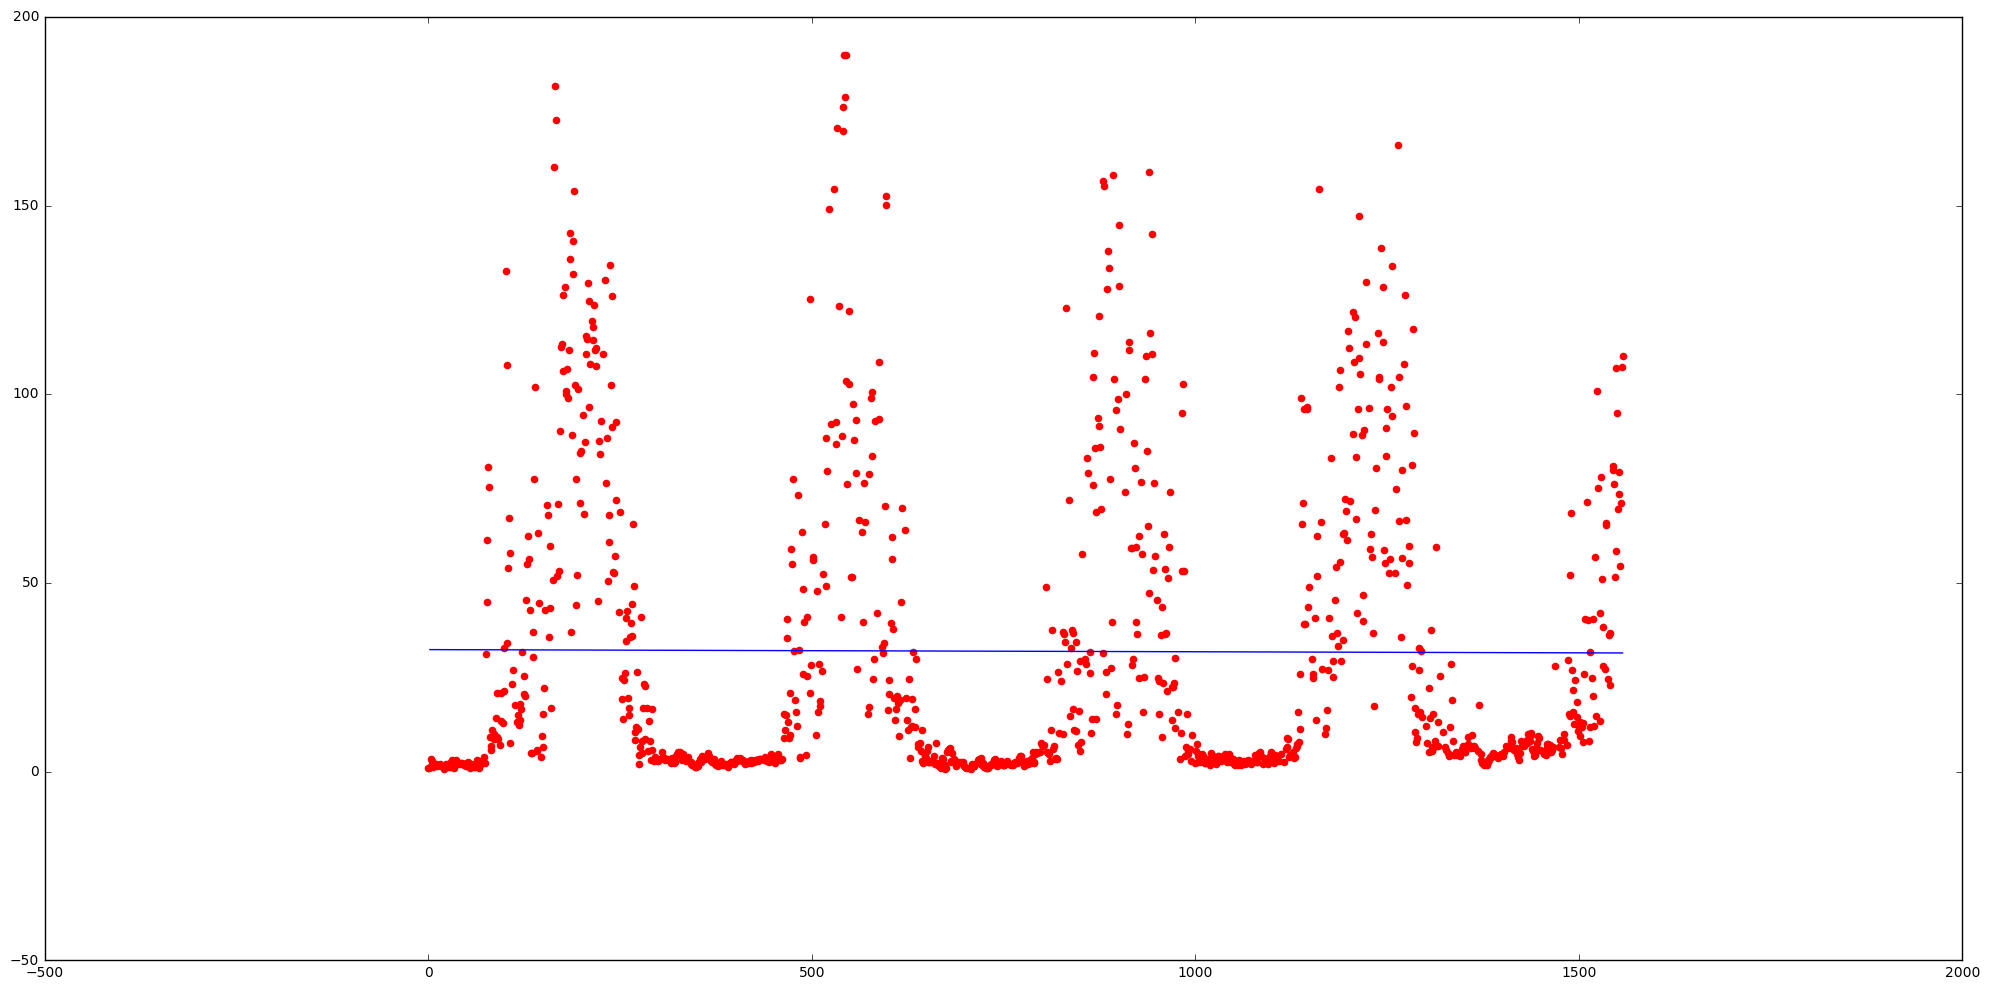

R^2 value = -0.00061515184812


In [118]:
colTrainByReg = DeepCopy(colTrain)
s, rReg = fillByLinReg(colTrainByReg)
print 'R^2 value =', rReg

### 6. Polynomial regression

degree: 1 , R: -0.000615151848234
degree: 2 , R: -0.000143951459487
degree: 4 , R: 0.0117805088345
degree: 8 , R: 0.0857734879361
degree: 12 , R: -8.58800599824e+22


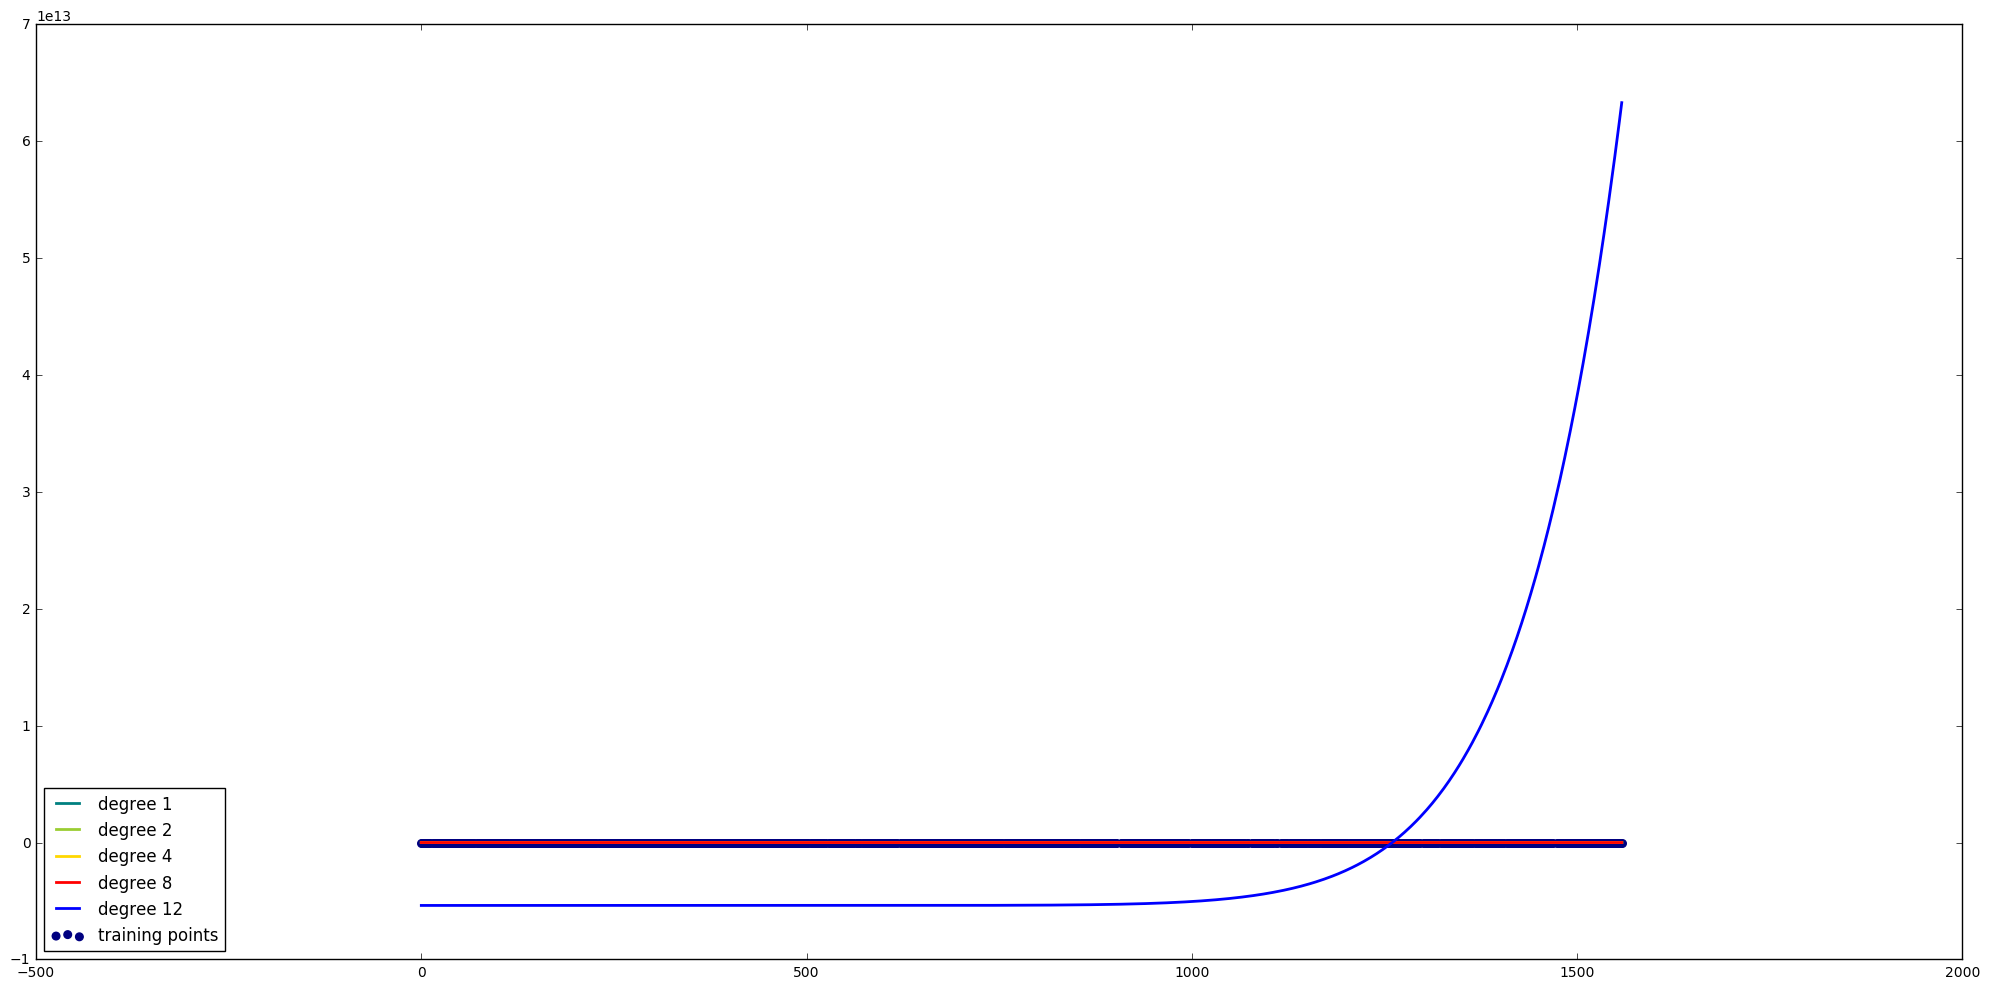

In [119]:
colTrainByPoly = DeepCopy(colTrain)
rPoly = fillByPolynomial(colTrainByPoly)

### Support Vector Regression (SVR) using linear and non-linear kernels

SupportVectorRegression R (Kernel:rbf): 0.663500328261


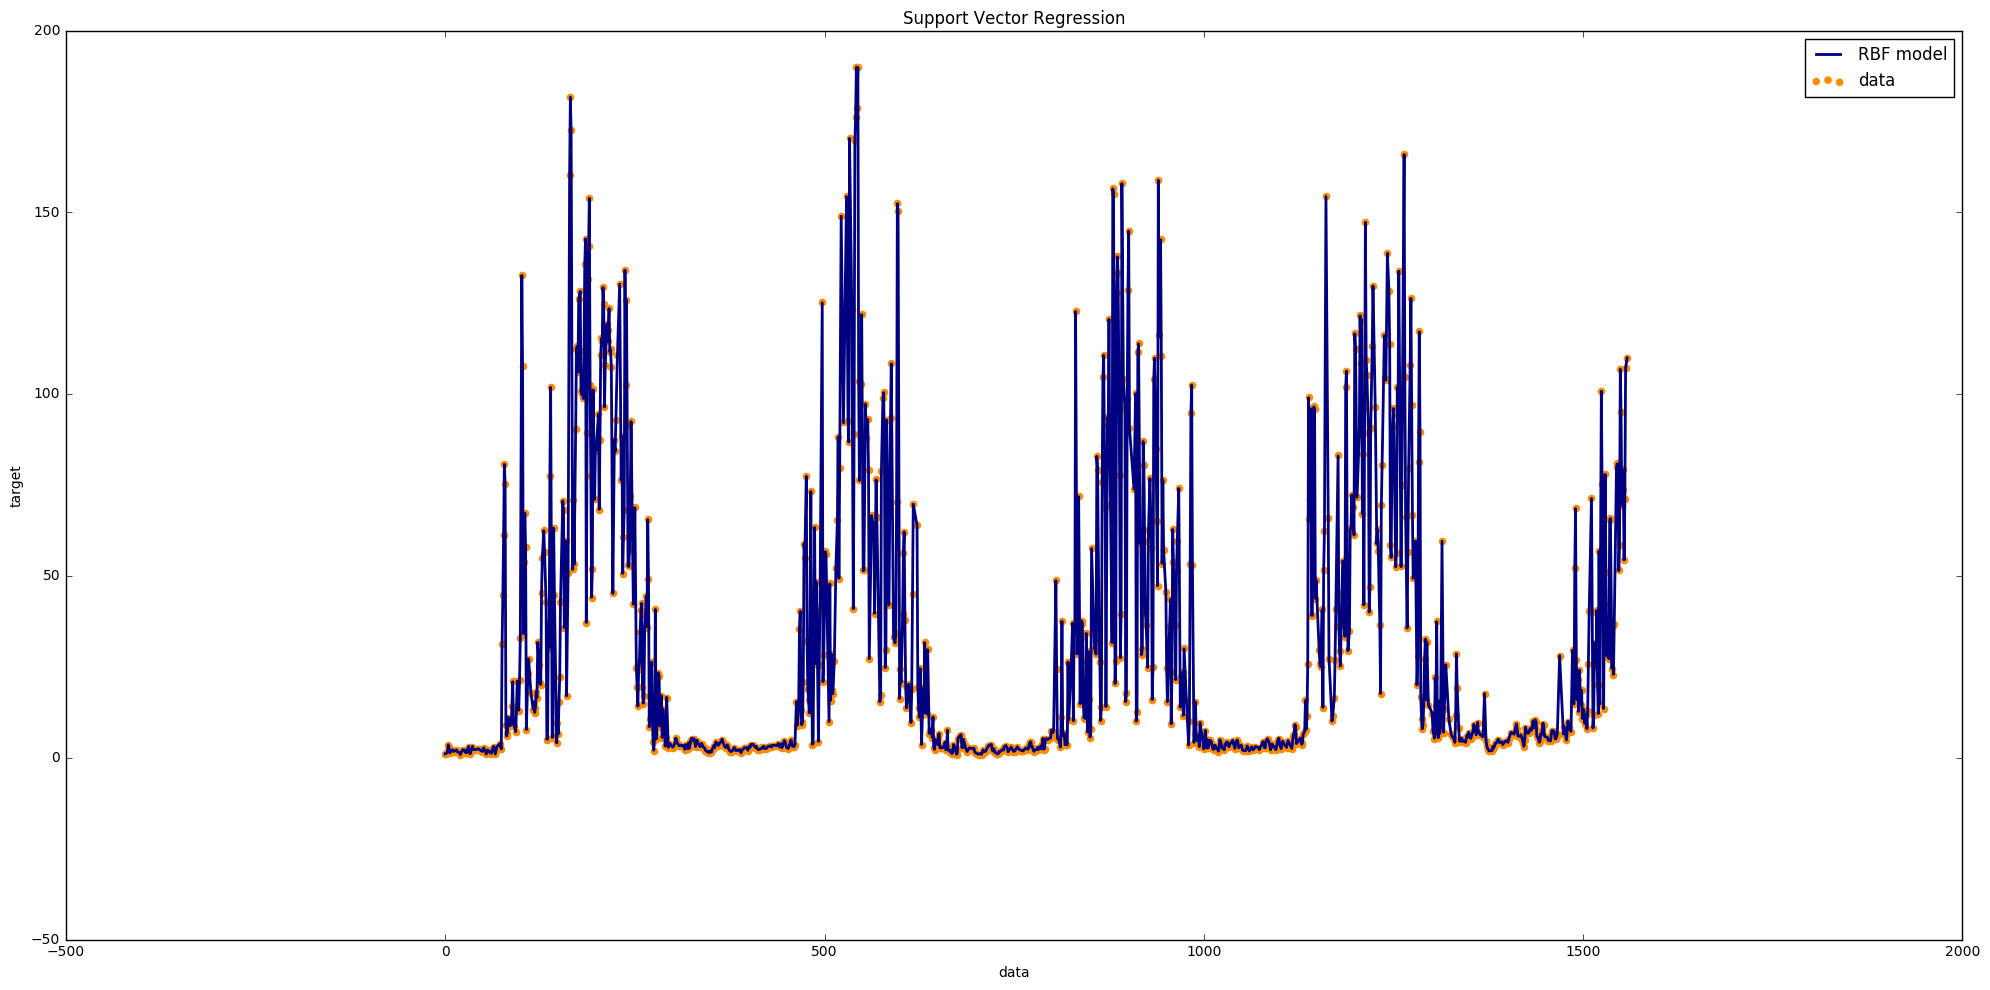

In [121]:
colTrainBySVR = DeepCopy(colTrain)
rSVR = SupportVectorRegression(colTrainBySVR)

### 8. result 

In [122]:
dailyChilledWaterWithFeatures = {}
dailyChilledWaterWithFeatures["mean"] = RSquareMean
dailyChilledWaterWithFeatures["median"] = RSquareMedian
dailyChilledWaterWithFeatures["knn"] = theMax
dailyChilledWaterWithFeatures["rReg"] = rReg
dailyChilledWaterWithFeatures['rPoly'] = rPoly
dailyChilledWaterWithFeatures['rSVR'] = rSVR
print dailyChilledWaterWithFeatures

{'knn': 0.77534940711438827, 'median': 0.61082193861500667, 'rPoly': 0.085773487936064319, 'rReg': -0.00061515184811966606, 'rSVR': 0.66350032826148664, 'mean': 0.66438362612317214}


# dailySteamWithFeatures.csv

### 1. data exploration 

In [123]:
fn3 =  'dailySteamWithFeatures'
theDir = 'data/'

dTrain = GetPandasFromCsv(theDir, fn3 + "_train.csv")
dTest = GetPandasFromCsv(theDir, fn3 + "_test.csv")

index =  dTrain.columns.values
dTrain.rename(columns={index[0]:"time"},inplace=True)
dTest.rename(columns={index[0]:"time"},inplace=True)

indexNum = 1
index = dTrain.columns.values
print index
print index[indexNum]
colTest = dTest[index[indexNum]]
colTrain = dTrain[index[indexNum]]

dfnull = colTrain[colTrain.isnull()]
temp = dfnull.index.values
my_test =colTest[temp]

['time' 'steam-LBS' 'startDay' 'endDay' 'RH-%' 'T-C' 'Tdew-C'
 'pressure-mbar' 'solarRadiation-W/m2' 'windDirection' 'windSpeed-m/s'
 'humidityRatio-kg/kg' 'coolingDegrees' 'heatingDegrees' 'dehumidification'
 'occupancy']
steam-LBS


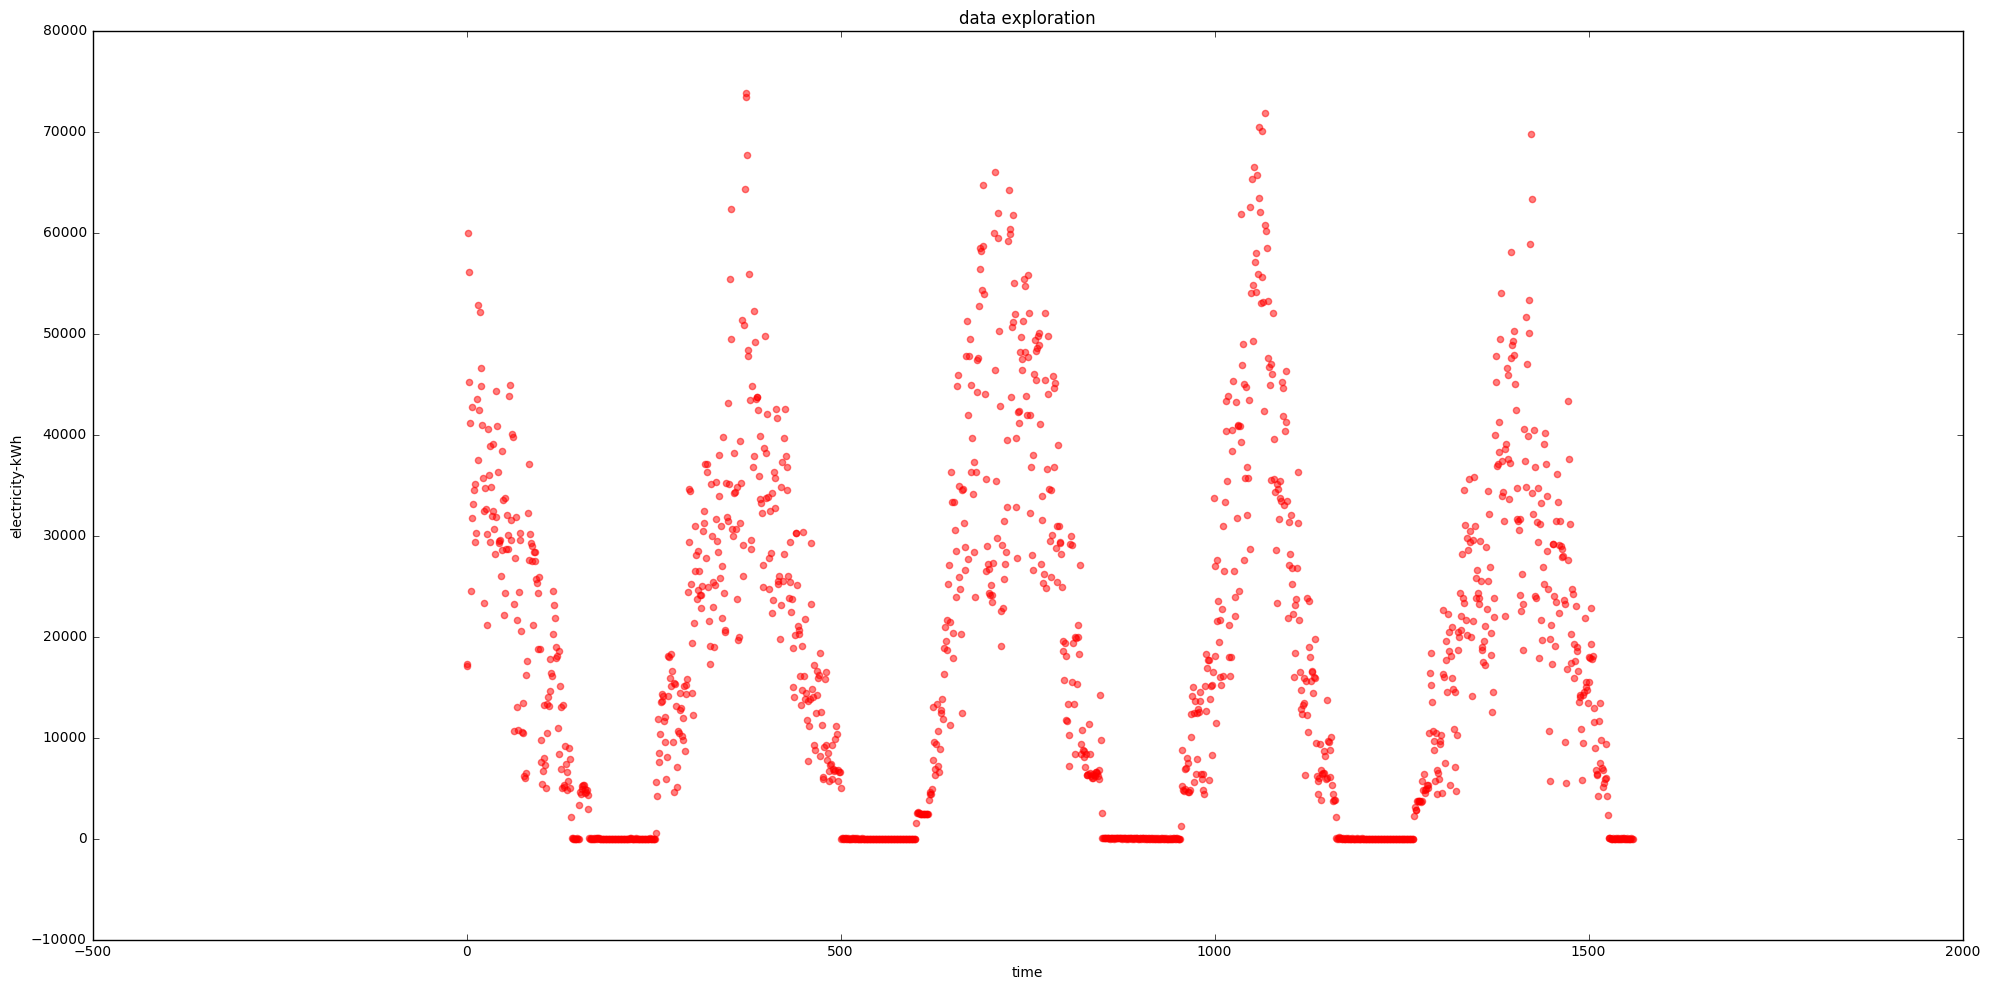

In [124]:
VisScatterPlot(colTest)

### 2. by mean

In [125]:
colTrainByMean = DeepCopy(colTrain)
colTrainByMean = fillByMean(colTrainByMean)
RSquareMean = R_Squared_CoefficientOfDetermination(colTrainByMean,colTest)
print "R Square :", RSquareMean

the mean of the data : 17422.6712776
R Square : 0.59955162809


### 3. by median

In [127]:
colTrainByMedian = DeepCopy(colTrain)
colTrainByMedian = fillByMedian(colTrainByMedian)
RSquareMedian = R_Squared_CoefficientOfDetermination(colTrainByMedian,colTest)
print "R Square :", RSquareMedian

the median of the data : 13839.3391927
R Square : 0.580420037525


### 4. by KNN

In [129]:
colTrainByKNN = DeepCopy(colTrain)
rSquare = []
theMax = -100000
theMaxK = 0
for k in range(1,20):
    temp, r = fillByKNN(colTrainByKNN, k)
    print 'R^2 value of KNN fit, for k=', k , ', ', r
    rSquare.append(r)
    if theMax < r:
        theMax = r
        theMaxK = k
print "---------------------------"
print "the max K :", theMaxK , ", R:",theMax

R^2 value of KNN fit, for k= 1 ,  0.879830999572
R^2 value of KNN fit, for k= 2 ,  0.899914414881
R^2 value of KNN fit, for k= 3 ,  0.891292584438
R^2 value of KNN fit, for k= 4 ,  0.886091675678
R^2 value of KNN fit, for k= 5 ,  0.876653721675
R^2 value of KNN fit, for k= 6 ,  0.874472457204
R^2 value of KNN fit, for k= 7 ,  0.874495396204
R^2 value of KNN fit, for k= 8 ,  0.869115785824
R^2 value of KNN fit, for k= 9 ,  0.861670368063
R^2 value of KNN fit, for k= 10 ,  0.853641265322
R^2 value of KNN fit, for k= 11 ,  0.848759815186
R^2 value of KNN fit, for k= 12 ,  0.844117849142
R^2 value of KNN fit, for k= 13 ,  0.840912402501
R^2 value of KNN fit, for k= 14 ,  0.834936639631
R^2 value of KNN fit, for k= 15 ,  0.830162751363
R^2 value of KNN fit, for k= 16 ,  0.826231562735
R^2 value of KNN fit, for k= 17 ,  0.8231642806
R^2 value of KNN fit, for k= 18 ,  0.820419691014
R^2 value of KNN fit, for k= 19 ,  0.818970350015
---------------------------
the max K : 2 , R: 0.899914414881

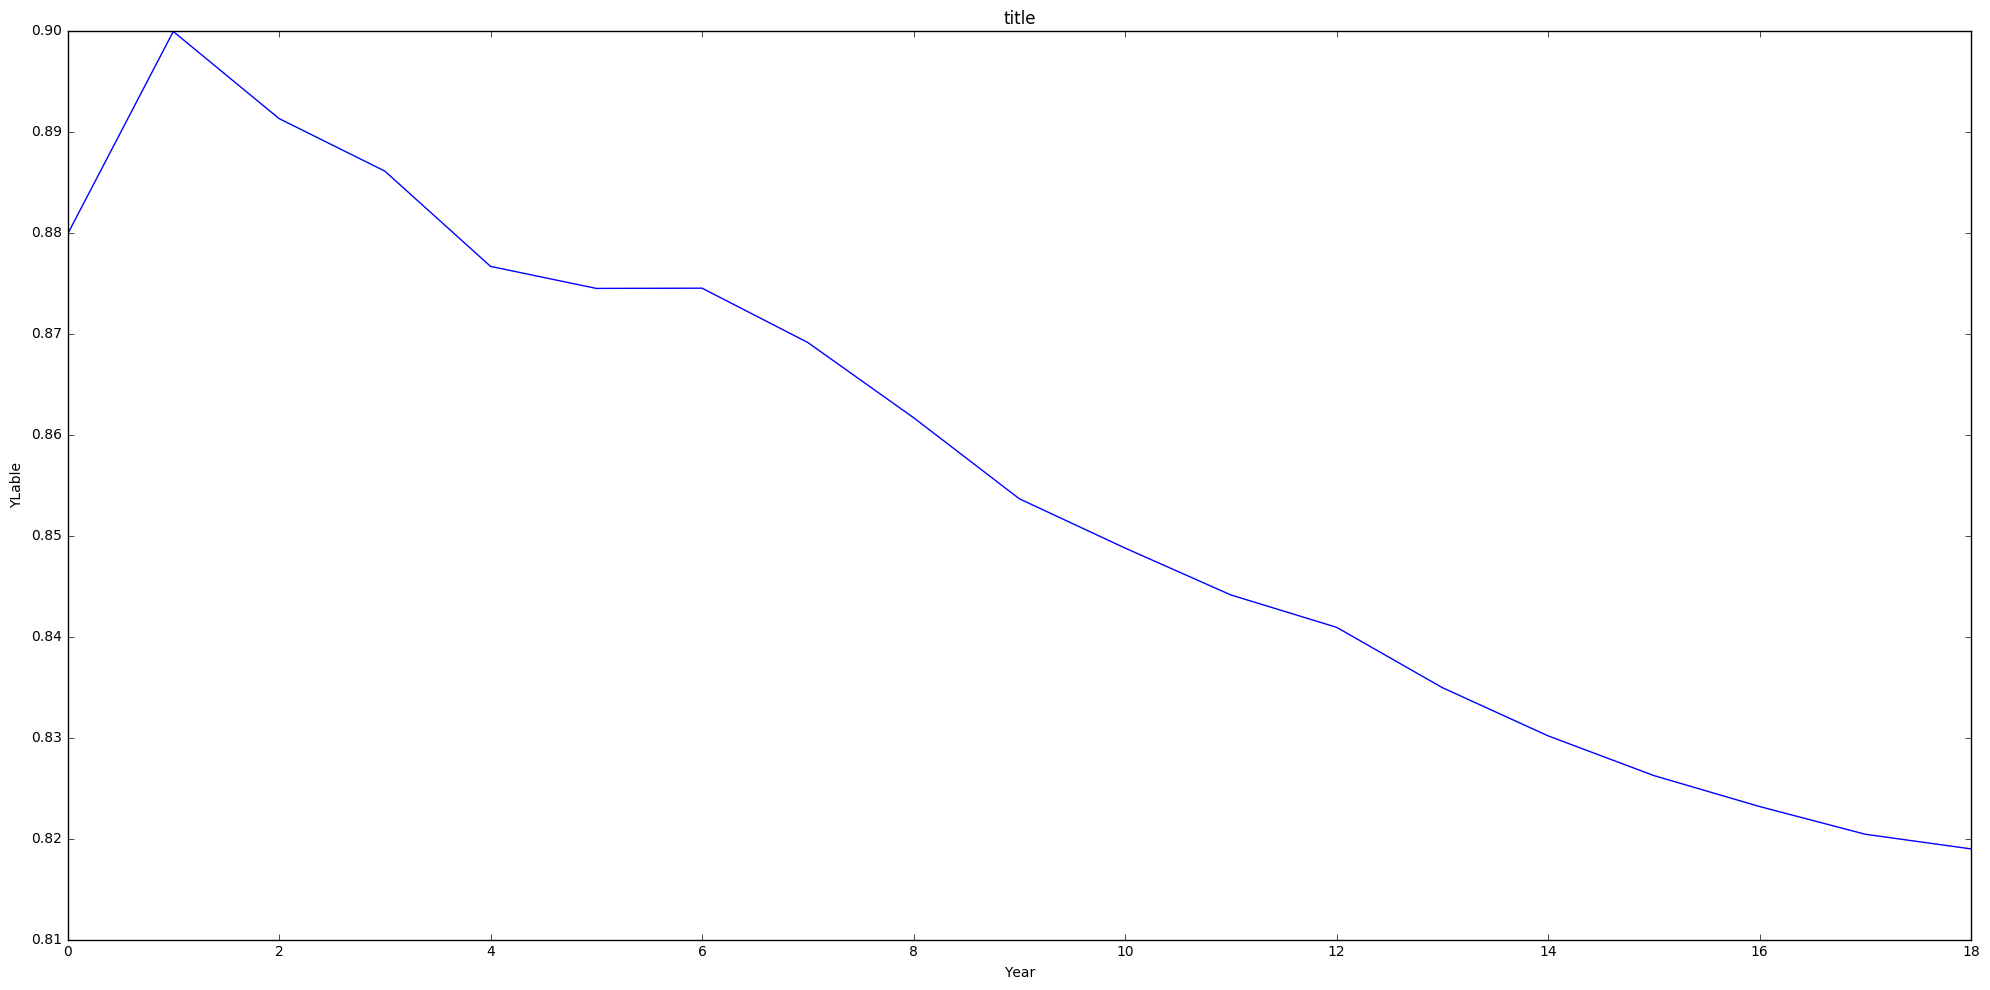

<module 'matplotlib.pyplot' from 'C:\Users\EllieHan\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

In [130]:
VisSquarePlot(rSquare)

### 5. Linear regression

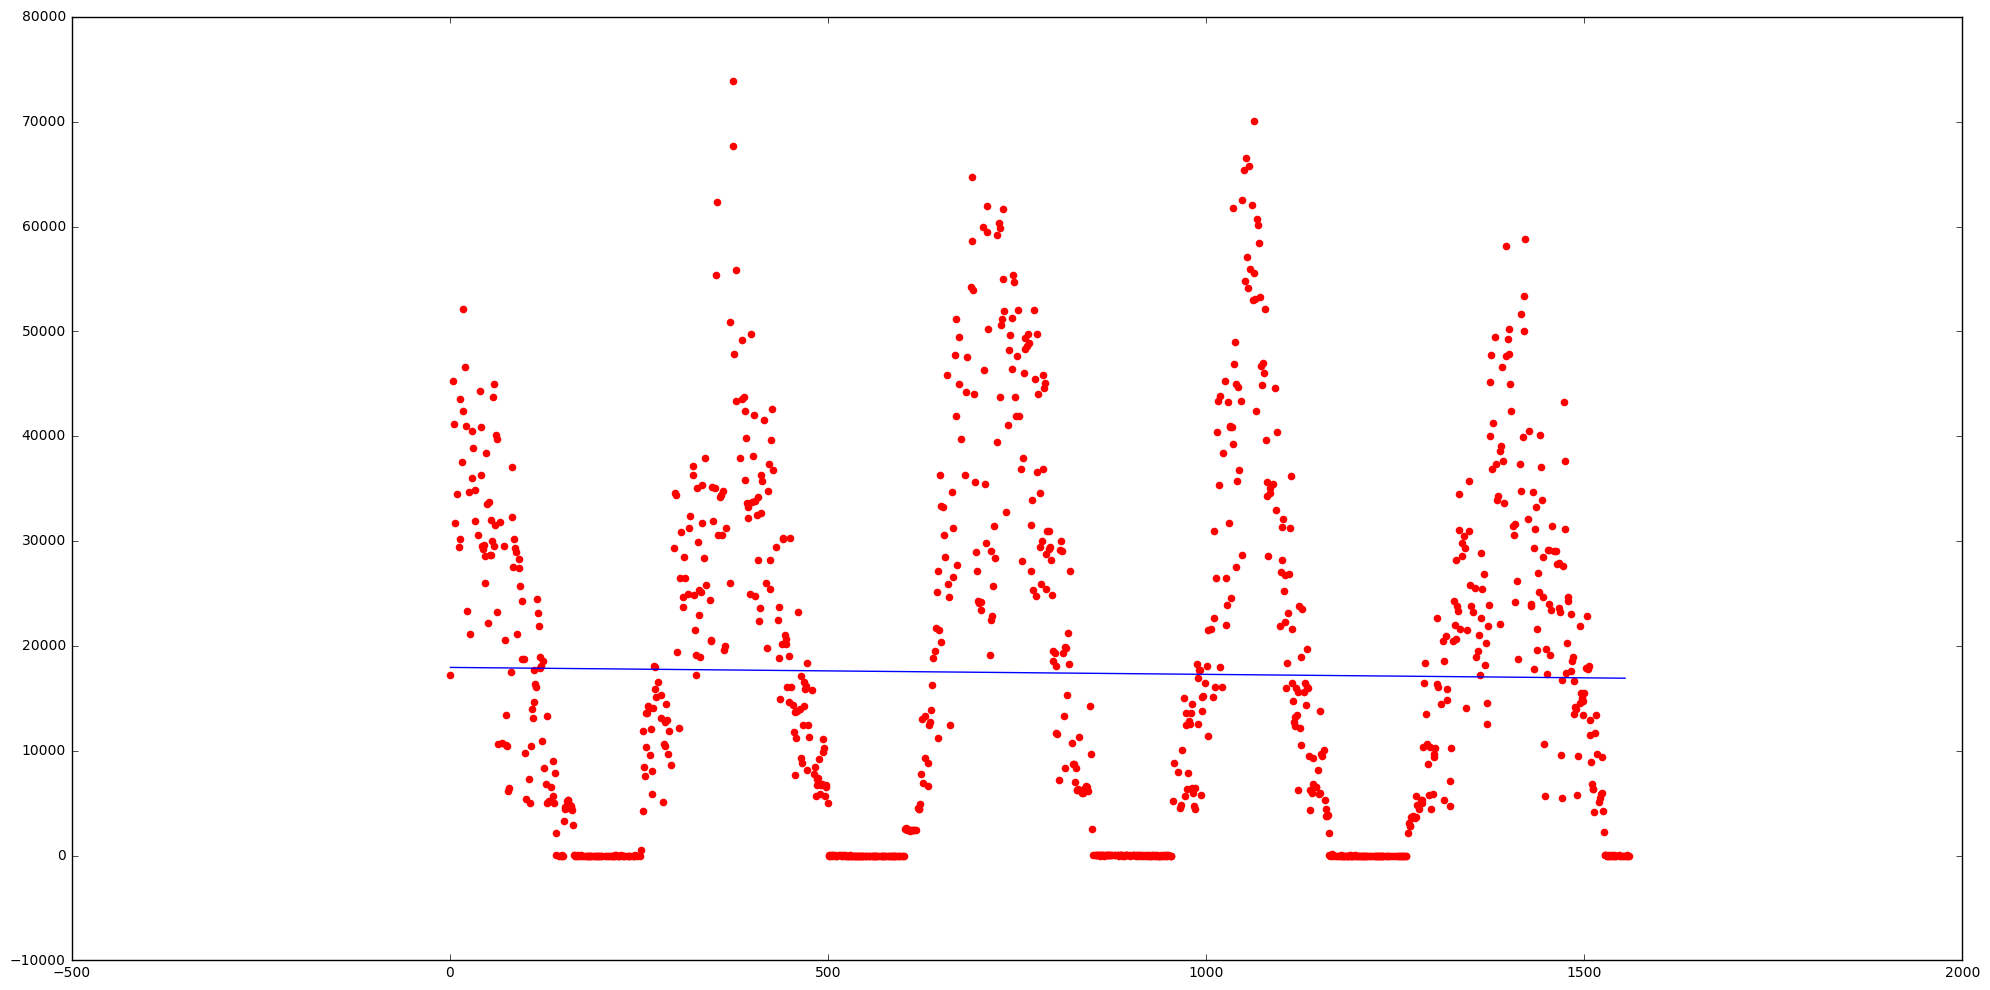

R^2 value = -0.0041281941595


In [131]:
colTrainByReg = DeepCopy(colTrain)
s, rReg = fillByLinReg(colTrainByReg)
print 'R^2 value =', rReg

### 6. Polynomial regression

degree: 1 , R: -0.00412819416025
degree: 2 , R: -0.00414646509587
degree: 4 , R: 0.00950884262859
degree: 8 , R: 0.191180910642
degree: 12 , R: 0.434325707487


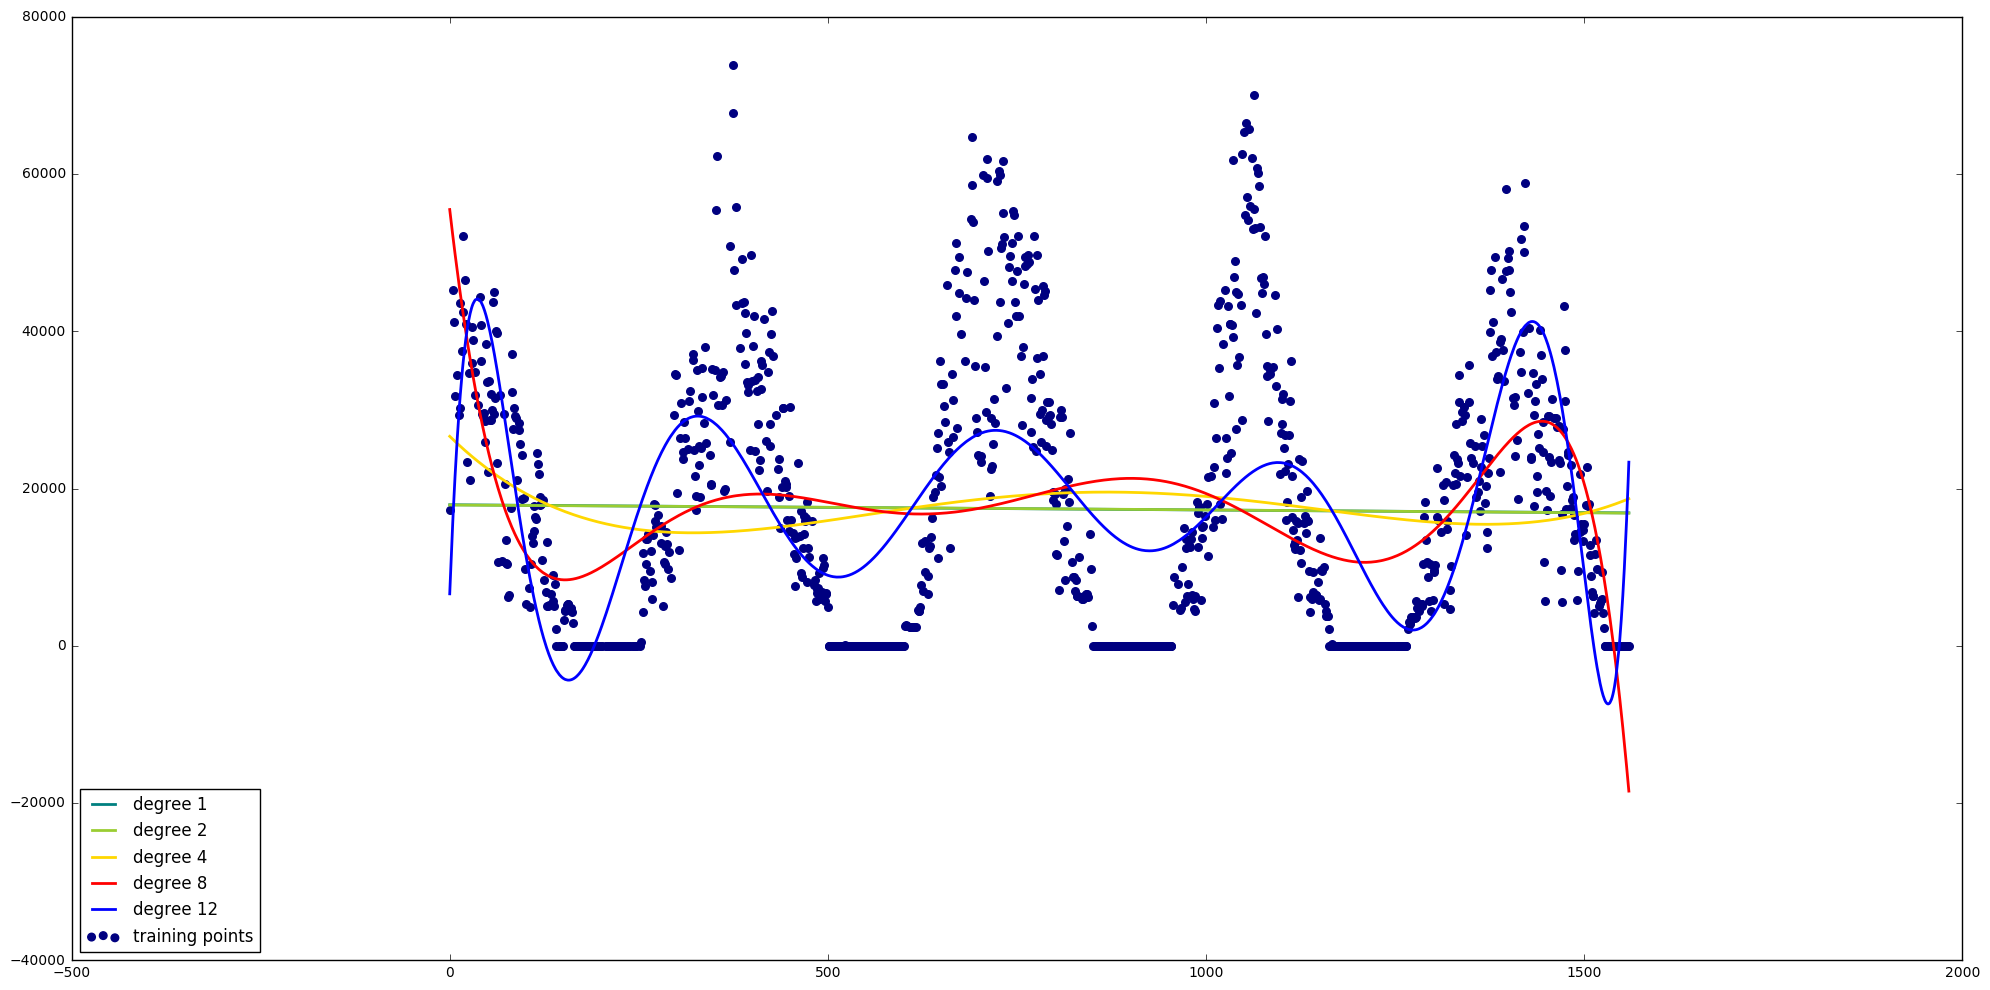

In [132]:
colTrainByPoly = DeepCopy(colTrain)
rPoly = fillByPolynomial(colTrainByPoly)


### 7. Support Vector Regression (SVR) using linear and non-linear kernels

SupportVectorRegression R (Kernel:rbf): -0.0132808083588


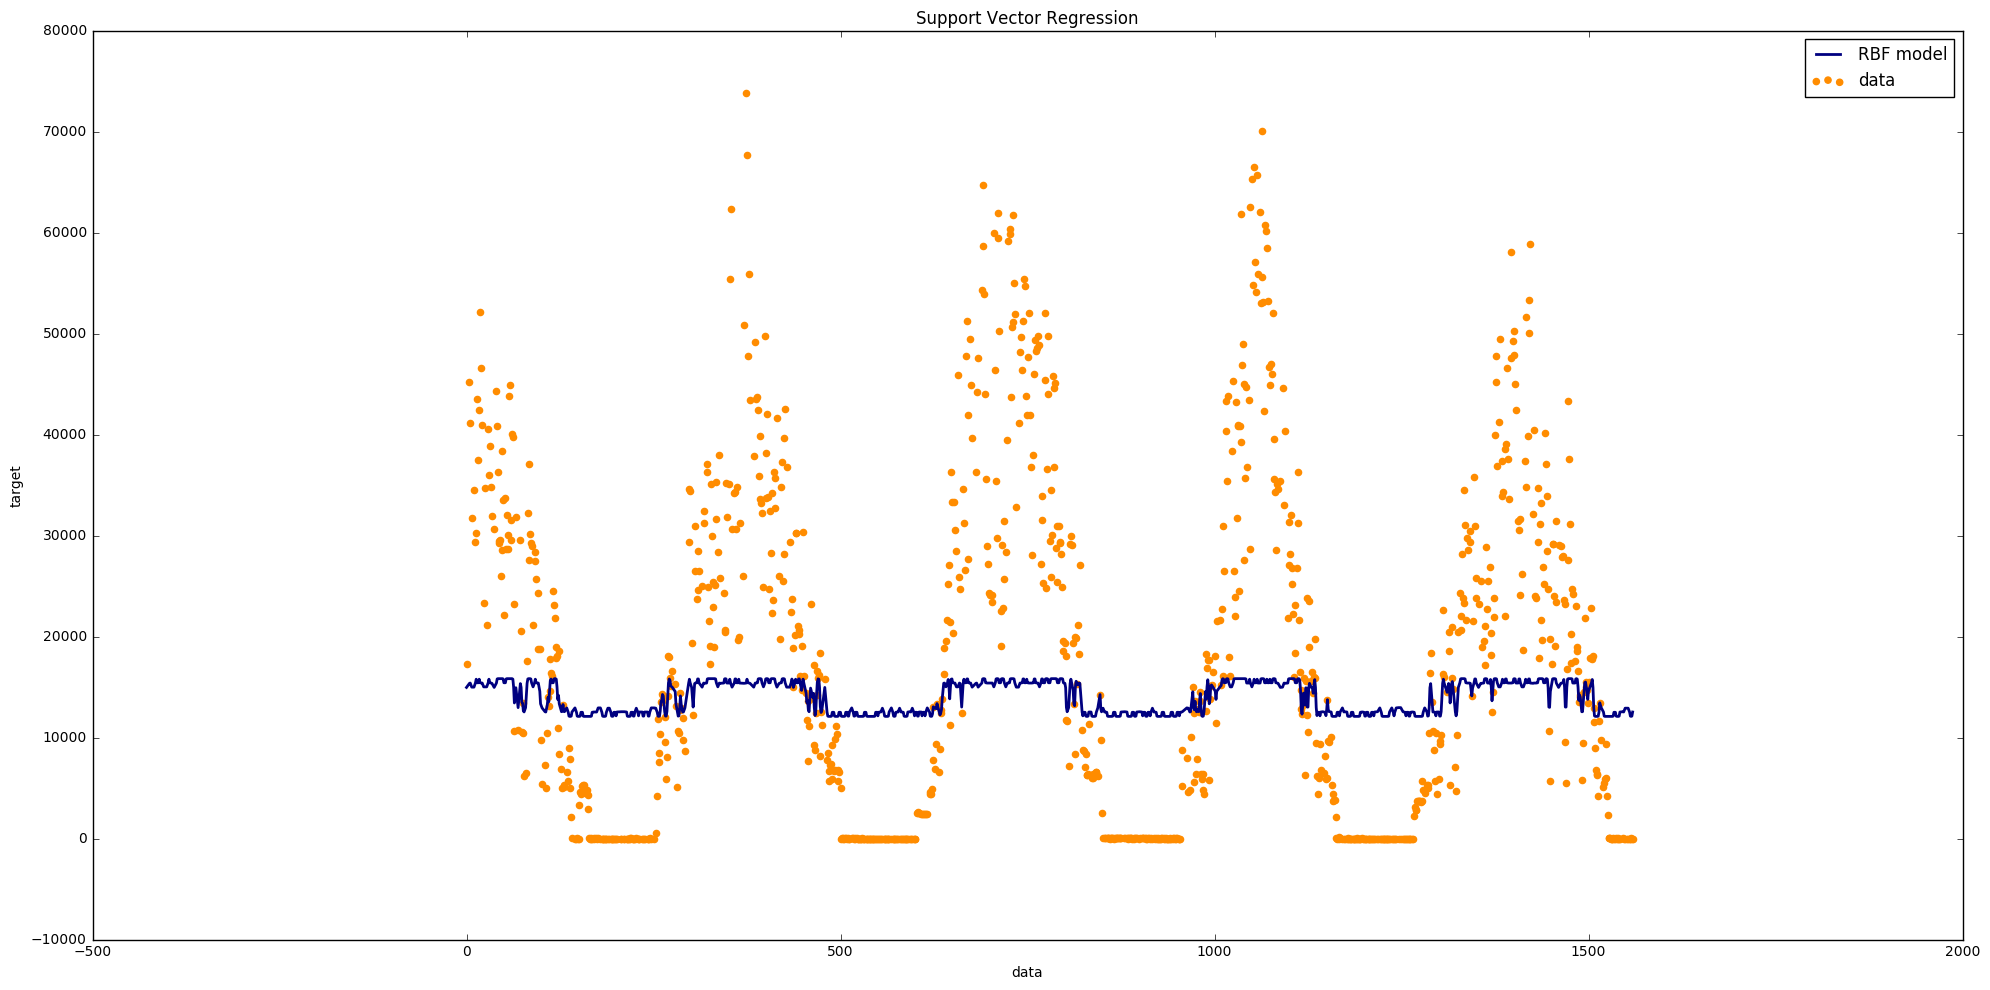

-0.0132808083588


In [133]:
colTrainBySVR = DeepCopy(colTrain)
rSVR = SupportVectorRegression(colTrainBySVR)
print rSVR

### 8. result 

In [134]:
dailySteamWithFeatures = {}
dailySteamWithFeatures["mean"] = RSquareMean
dailySteamWithFeatures["median"] = RSquareMedian
dailySteamWithFeatures["knn"] = theMax
dailySteamWithFeatures["rReg"] = rReg
dailySteamWithFeatures['rPoly'] = rPoly
dailySteamWithFeatures['rSVR'] = rSVR
print dailySteamWithFeatures

{'knn': 0.89991441488070145, 'median': 0.58042003752470439, 'rPoly': 0.43432570748694743, 'rReg': -0.0041281941594952798, 'rSVR': -0.013280808358753449, 'mean': 0.59955162808991591}


# Conclusion

In [135]:
print dailyElectricityWithFeatures
print dailyChilledWaterWithFeatures
print dailySteamWithFeatures
resultList = [dailyElectricityWithFeatures,dailyChilledWaterWithFeatures,dailySteamWithFeatures]

{'knn': 0.68382611017334094, 'median': 0.66269080040803741, 'rPoly': 0.15375114854655281, 'rReg': 0.053534325716748432, 'rSVR': 0.48613748301872339, 'mean': 0.66297238510807188}
{'knn': 0.77534940711438827, 'median': 0.61082193861500667, 'rPoly': 0.085773487936064319, 'rReg': -0.00061515184811966606, 'rSVR': 0.66350032826148664, 'mean': 0.66438362612317214}
{'knn': 0.89991441488070145, 'median': 0.58042003752470439, 'rPoly': 0.43432570748694743, 'rReg': -0.0041281941594952798, 'rSVR': -0.013280808358753449, 'mean': 0.59955162808991591}


In [136]:
index = ['dailyElectricity', 'dailyChilledWater', 'dailySteam']
resultDF = pd.DataFrame(resultList, index=index)
resultDF.T

,dailyElectricity,dailyChilledWater,dailySteam
knn,0.683826,0.775349,0.899914
mean,0.662972,0.664384,0.599552
median,0.662691,0.610822,0.580420
rPoly,0.153751,0.085773,0.434326
rReg,0.053534,-0.000615,-0.004128
rSVR,0.486137,0.663500,-0.013281
